# PROJET 9 : LA POULE QUI CHANTE (partie 2)

## 1 Importation des librairies et de la table data

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [264]:
# Importation des données

data = pd.read_csv('Téléchargements.csv')
data.head(3)

,Zone,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,1.53,5.0,0.54
1,Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,35.69,143.0,14.11
2,Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,16.36,85.0,6.26


In [265]:
# Informations

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      168 non-null    object 
 1   PIB                                                       168 non-null    float64
 2   TDI(%)                                                    168 non-null    float64
 3   TAS(%)                                                    168 non-null    float64
 4   croissance_demographique(%)                               168 non-null    float64
 5   distance_France(km)                                       168 non-null    float64
 6   population_2017                                           168 non-null    float64
 7   stabilite_politique                                       168 non-null    float64
 8   Disponibilité alimen

## 2 Analyse des variables

In [266]:
# Définir la variable 'Zone' comme index

data.set_index('Zone', inplace=True)
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,1.53,5.0,0.54
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,35.69,143.0,14.11
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,16.36,85.0,6.26


### 2.1 Distribution des variables

<Axes: xlabel='croissance_demographique(%)'>

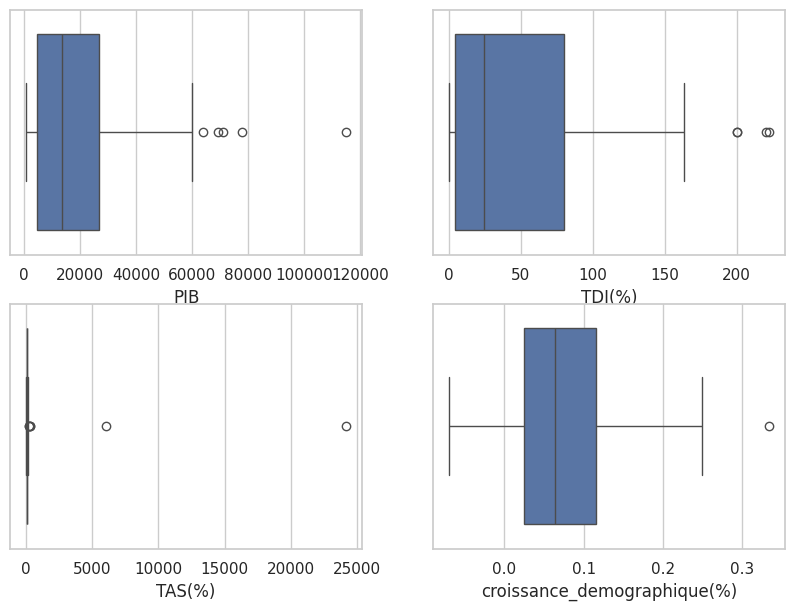

In [267]:
# Analyse univariée

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
plt.legend(fontsize='2')

# Variable 'PIB'
plt.subplot(221)
sns.boxplot(data = data, x ='PIB')

# Variable 'TDI (%)'
plt.subplot(222)
sns.boxplot(data = data, x = 'TDI(%)')

# Variable 'TAS (%)'
plt.subplot(223)
sns.boxplot(data = data, x = 'TAS(%)')

# Variable 'Croissance démographique'
plt.subplot(224)
sns.boxplot(data = data, x ='croissance_demographique(%)')

<Axes: xlabel='Disponibilité de protéines en quantité (g/personne/jour)'>

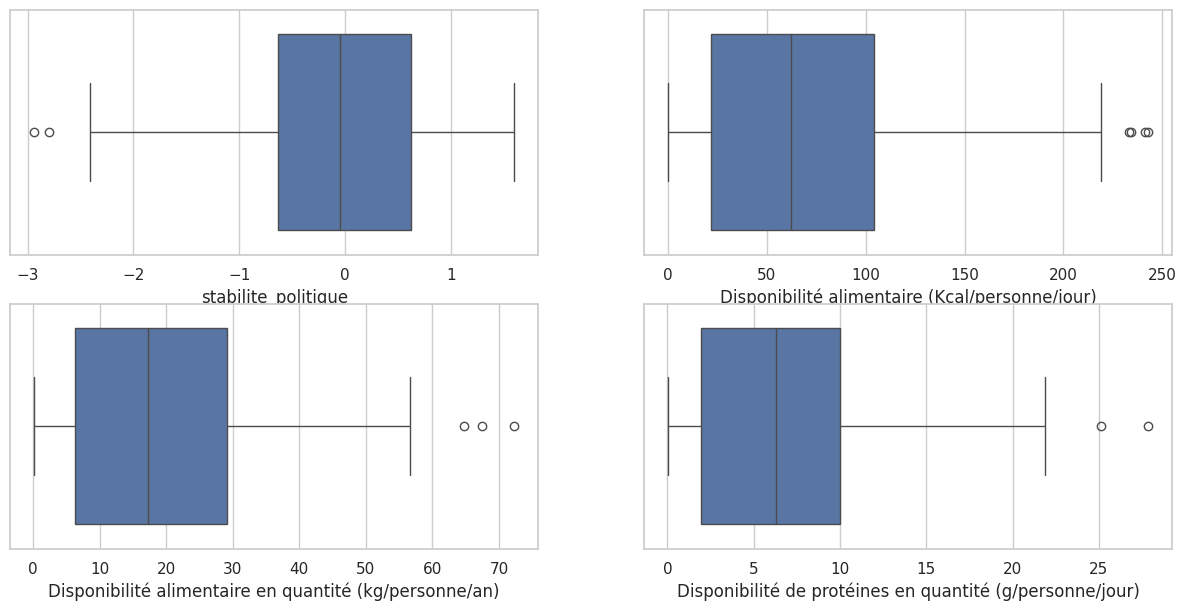

In [268]:
# Analyse univariée

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
plt.legend(fontsize='2')

plt.subplot(221)
sns.boxplot(data = data, x ='stabilite_politique')

plt.subplot(222)
sns.boxplot(data = data, x ='Disponibilité alimentaire (Kcal/personne/jour)')

# Variable 'Disponibilité alimentaire/an'
plt.subplot(223)
sns.boxplot(data = data, x ='Disponibilité alimentaire en quantité (kg/personne/an)')

# Variable 'Disponibilité de protéines'
plt.subplot(224)
sns.boxplot(data = data, x = 'Disponibilité de protéines en quantité (g/personne/jour)')

<Axes: xlabel='population_2017'>

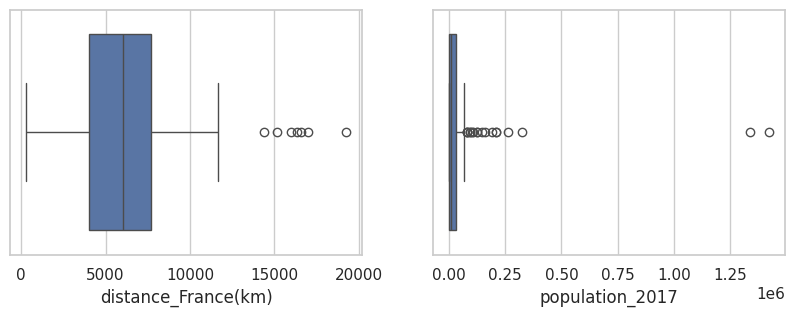

In [269]:
# Analyse univariée

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data = data, x ='distance_France(km)')

# Variable 'Population 2017'
plt.subplot(222)
sns.boxplot(data = data, x ='population_2017')

### 2.2 Les outliers

In [270]:
# Variable TAS(%)

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TAS(%)'].quantile(0.25)
Q3 = data['TAS(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TAS(%)'] < lower_bound) | (data['TAS(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TAS(%)':", outlier_indices.tolist())

Indices of outliers in 'TAS(%)': ['Belgique', 'Djibouti', 'Maldives', 'Pays-Bas', 'Pologne', 'Thaïlande']


In [271]:
# Variable TDI(%)

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TDI(%)'].quantile(0.25)
Q3 = data['TDI(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TDI(%)'] < lower_bound) | (data['TDI(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TDI(%)':", outlier_indices.tolist())

Indices of outliers in 'TDI(%)': ['Belgique', 'Gambie', 'Timor-Leste', 'Îles Salomon']


In [272]:
# Variable PIB

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['PIB'].quantile(0.25)
Q3 = data['PIB'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['PIB'] < lower_bound) | (data['PIB'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'PIB':", outlier_indices.tolist())

Indices of outliers in 'PIB': ['Irlande', 'Luxembourg', 'Norvège', 'Suisse', 'Émirats arabes unis']


In [273]:
# Variable Distance_France

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['distance_France(km)'].quantile(0.25)
Q3 = data['distance_France(km)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['distance_France(km)'] < lower_bound) | (data['distance_France(km)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'distance_France(km)':", outlier_indices.tolist())

Indices of outliers in 'distance_France(km)': ['Australie', 'Fidji', 'Kiribati', 'Nouvelle-Zélande', 'Samoa', 'Vanuatu', 'Îles Salomon']


In [274]:
# Variable population

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['population_2017'].quantile(0.25)
Q3 = data['population_2017'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['population_2017'] < lower_bound) | (data['population_2017'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'population_2017':", outlier_indices.tolist())

Indices of outliers in 'population_2017': ['Allemagne', 'Bangladesh', 'Brésil', 'Chine, continentale', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Japon', 'Mexique', 'Nigéria', 'Pakistan', 'Philippines', 'Turquie', 'Viet Nam', 'Égypte', "États-Unis d'Amérique", 'Éthiopie']


In [275]:
# Outliers de TDI

data.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Belgique,50442.300000,222.368421,304.605263,0.030165,6012.847299,1.141975e+04,0.430000,12.65,44.0,4.57
Timor-Leste,3138.400000,220.000000,20.000000,0.097321,6012.847299,1.243258e+03,0.070000,4.24,14.0,1.46
Îles Salomon,2625.100000,200.000000,0.000000,0.143825,15178.200000,6.360390e+02,0.200000,4.45,18.0,1.51
Gambie,1927.000000,200.000000,25.000000,0.162139,4308.250000,2.213889e+03,-0.080000,3.53,12.0,1.24
Pays-Bas,19924.718405,163.440860,295.698925,0.071514,6012.847299,4.396825e+04,-0.077771,20.33,70.0,8.48
...,...,...,...,...,...,...,...,...,...,...
Tunisie,10874.900000,0.000000,109.230769,0.054065,1483.828000,1.143344e+04,-1.020000,17.03,57.0,6.28
Ouganda,2128.400000,0.000000,98.484848,0.191208,6128.938000,4.116659e+04,-0.570000,1.52,5.0,0.51
Inde,6112.100000,0.000000,96.831467,0.057590,6594.230000,1.338677e+06,-0.760000,2.22,7.0,0.75


In [276]:
# Variable TDI

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TDI(%)'].quantile(0.25)
Q3 = data['TDI(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TDI(%)'] < lower_bound) | (data['TDI(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TDI(%)':", outlier_indices.tolist())

Indices of outliers in 'TDI(%)': ['Belgique', 'Gambie', 'Timor-Leste', 'Îles Salomon']


In [277]:
# Outliers de TAS

data.sort_values(by='TAS(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Djibouti,4451.700000,100.000000,24173.015873,0.087500,5595.459000,944.099000,-0.740000,2.68,9.0,0.92
Maldives,18973.600000,100.000000,6043.253968,0.249637,8294.178000,496.402000,0.230000,13.50,47.0,4.70
Belgique,50442.300000,222.368421,304.605263,0.030165,6012.847299,11419.748000,0.430000,12.65,44.0,4.57
Pays-Bas,19924.718405,163.440860,295.698925,0.071514,6012.847299,43968.249952,-0.077771,20.33,70.0,8.48
Pologne,29958.100000,4.757785,203.373702,-0.007164,1368.178000,37953.180000,0.520000,30.30,107.0,12.14
...,...,...,...,...,...,...,...,...,...,...
Mongolie,11431.500000,111.111111,0.000000,0.102343,7053.423000,3113.786000,0.790000,2.77,9.0,0.95
Luxembourg,114986.000000,100.000000,0.000000,0.115008,289.102300,591.910000,1.330000,18.33,69.0,7.19
Dominique,11511.600000,100.000000,0.000000,0.006947,6826.396000,71.458000,1.200000,35.19,150.0,11.52


In [278]:
# Exclure les 2 pays qui ont des valeurs extrèmes

data = data.drop(['Djibouti','Maldives'])

In [279]:
# Moyennes de chaque variable

data.mean()

PIB                                                         19162.389330
TDI(%)                                                         42.861631
TAS(%)                                                         78.914978
croissance_demographique(%)                                     0.070344
distance_France(km)                                          6001.618730
population_2017                                             44489.310186
stabilite_politique                                            -0.090187
Disponibilité alimentaire en quantité (kg/personne/an)         19.978735
Disponibilité alimentaire (Kcal/personne/jour)                 73.481928
Disponibilité de protéines en quantité (g/personne/jour)        7.018795
dtype: float64

### 2.3 Corrélations des variables


Text(0.5, 1.0, 'Graphique 1: Corrélation entre les variables')

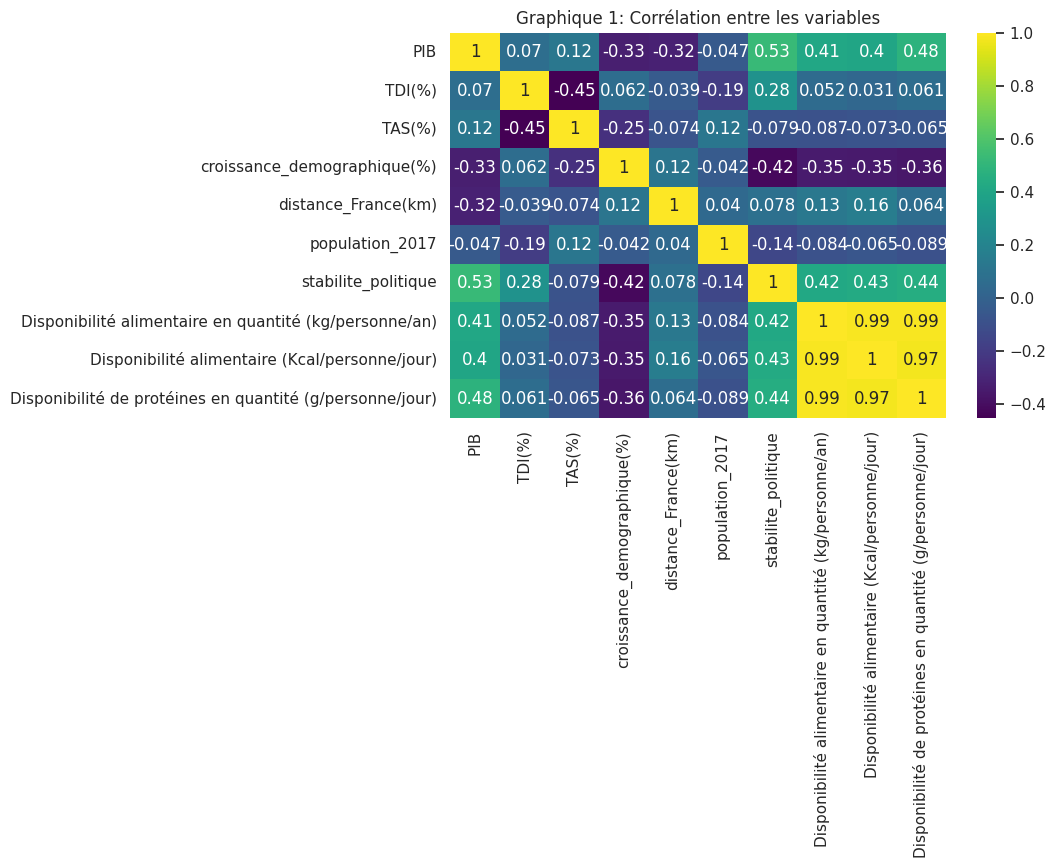

In [280]:
# Carte de chaleur /Heatmap des corrélations entre les variables

plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
plt.title('Graphique 1: Corrélation entre les variables')

Les disponibilités sont très correlées entre elles.

In [281]:
# Suppression des autres Disponibilités

data = data.drop(columns = ['Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)'])
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,5.0
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,85.0


In [282]:
# Renommer la variable disponibilité

data.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)': 'disponibilite_alimentaire'}, inplace = True)
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,5.0
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,85.0


## 3 Etude de marché approfondie



### 3.1 Les variables : Analyse en composantes principales (ACP)

#### a. Eboulis des valeurs propres

In [283]:
# Normalisation des données

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Transformation en array Numpy

X = data.values

# Standardiser les données

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

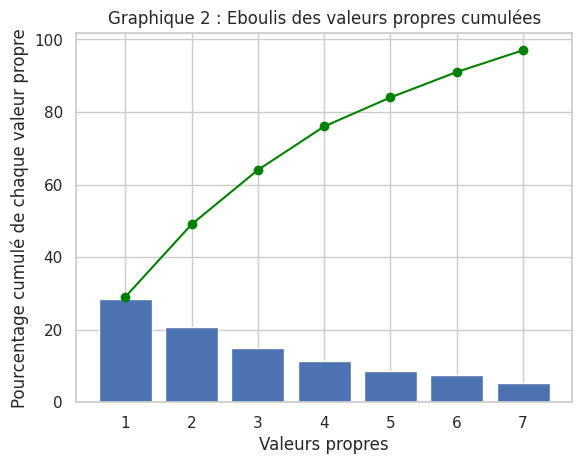

In [284]:
# Eboulis des valeurs propres

n_components = 7
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="green",marker='o')
plt.xlabel("Valeurs propres")
plt.ylabel("Pourcentage cumulé de chaque valeur propre")
plt.title("Graphique 2 : Eboulis des valeurs propres cumulées")
plt.show(block=False)

On a utilisé l'Eboulis des valeurs propres pour choisir :

Le nombre de composantes principales qui expliquent un pourcentage de la variance, ici 5.

Il s'agit du nombre de composantes principales correspondant au « coude » du graphe, à partir duquel ajouter une nouvelle composante principale ne fait pas grande différence.

#### b. Les composantes principales

In [285]:
# Calcul des premières composantes principales
# Pourcentage de variance expliquée

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.28574163 0.20765306 0.14982097 0.11269647 0.08475332 0.07385224
 0.05285398]
0.9673716769096073


 Le pourcentage de variance expliquée par chacune des composantes : Les 2 premières composantes expliquent environ 50% de la variance observée dans les données.

 Les 5 premières composantes expliquent 84% et les 7PCP expliquent 96 % de la variance totale.

 Commençons par visualiser nos données sur les 2 premières composantes principales, afin d'avoir une première vue sur une base orthonormée (en 2D).

#### c. Contribution de chaque variable aux composantes

In [286]:
features = ['PIB', 'TDI(%)',	'TAS(%)',	'croissance_demographique(%)',	'distance_France(km)',	'population_2017',	'stabilite_politique',	'disponibilite_alimentaire']

def correlation_graph(pca,
                      x_y,
                      features) :
# Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(9, 7))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Graphique 3 :Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
   # Axes et display
    plt.axis('equal')
    plt.show(block=False)

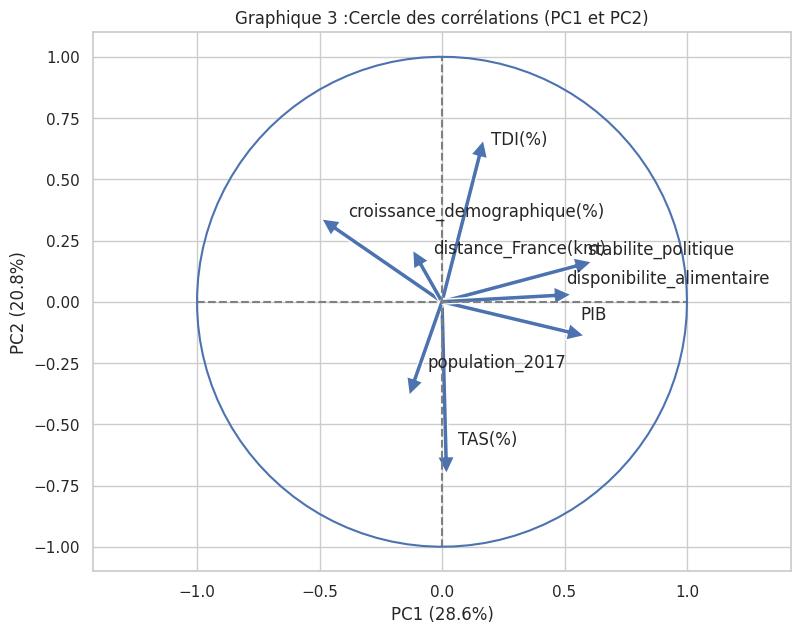

In [287]:
# PC1 et PC2 (~ 50%)

correlation_graph(pca, (0,1), features)

In [288]:
# Les composantes

#pcs = pca.components_

In [289]:
#pcs = pd.DataFrame(pcs)
#pcs

In [290]:
#pcs.columns = features

In [291]:
# Ajouter les variables

#pcs.T

In [292]:
# Corrélation PCP et variables

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t, index=[f'PC{i+1}' for i in range(t.shape[0])], columns=features)
df_corr_comp.head()


,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
PC1,0.513123,0.151863,0.016406,-0.433871,-0.085305,-0.110863,0.544037,0.457805
PC2,-0.122536,0.592555,-0.632614,0.298705,0.150142,-0.316555,0.145050,0.025486
PC3,-0.271678,-0.195000,-0.022713,-0.058995,0.827872,0.207969,0.120484,0.375540
PC4,0.095931,0.229670,-0.297004,-0.018689,-0.143882,0.909646,0.024783,-0.026757
PC5,-0.351525,0.412582,0.266984,-0.534310,0.147911,0.010626,0.243380,-0.517894


In [293]:
df_corr_comp.head().T

,PC1,PC2,PC3,PC4,PC5
PIB,0.513123,-0.122536,-0.271678,0.095931,-0.351525
TDI(%),0.151863,0.592555,-0.195000,0.229670,0.412582
TAS(%),0.016406,-0.632614,-0.022713,-0.297004,0.266984
croissance_demographique(%),-0.433871,0.298705,-0.058995,-0.018689,-0.534310
distance_France(km),-0.085305,0.150142,0.827872,-0.143882,0.147911
population_2017,-0.110863,-0.316555,0.207969,0.909646,0.010626
stabilite_politique,0.544037,0.145050,0.120484,0.024783,0.243380
disponibilite_alimentaire,0.457805,0.025486,0.375540,-0.026757,-0.517894


<Axes: >

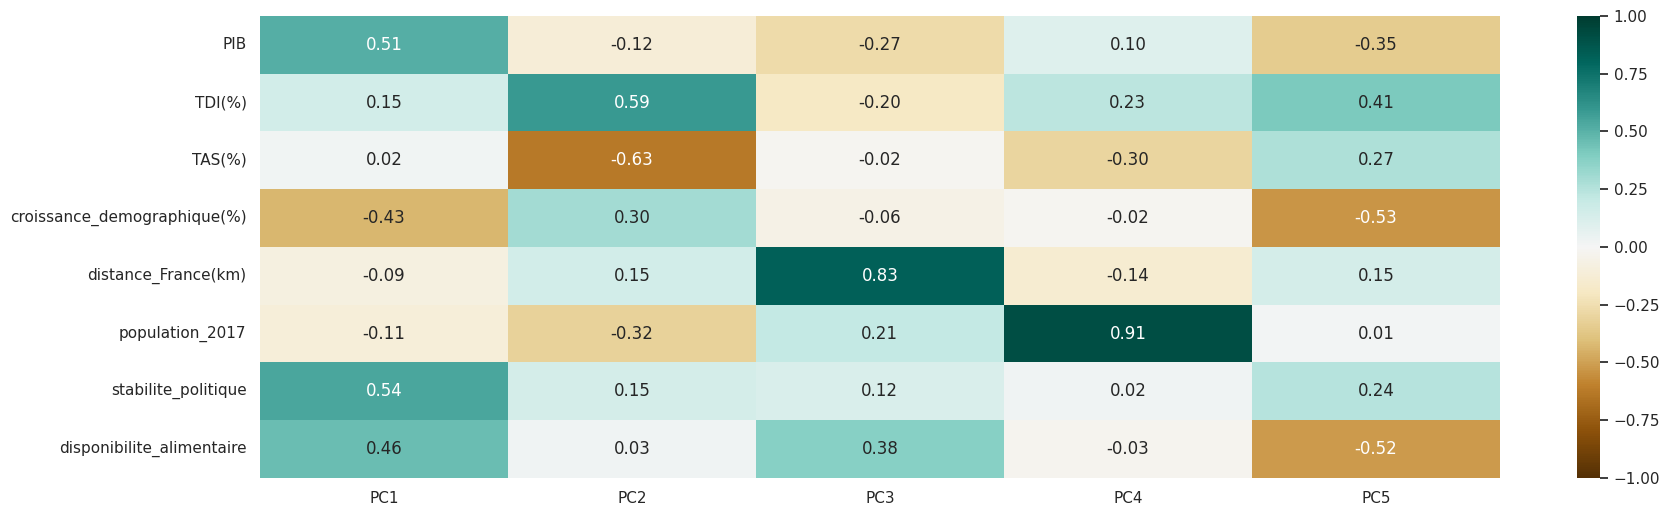

In [294]:
# Heatmap

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_corr_comp.head().T, vmin=-1, vmax=1, annot=True, cmap="BrBG", fmt="0.2f")

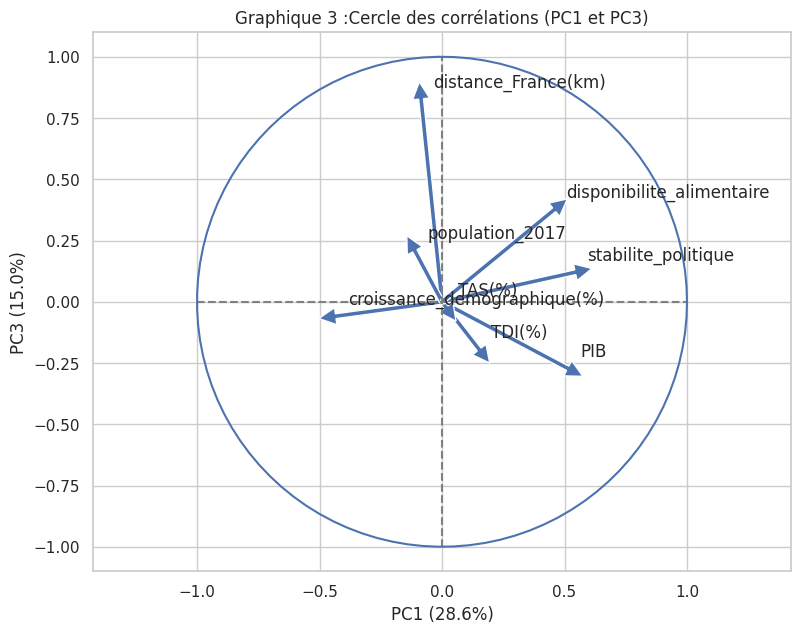

In [295]:
# PC1 et PC3 (~ 47%)

correlation_graph(pca, (0,2), features)


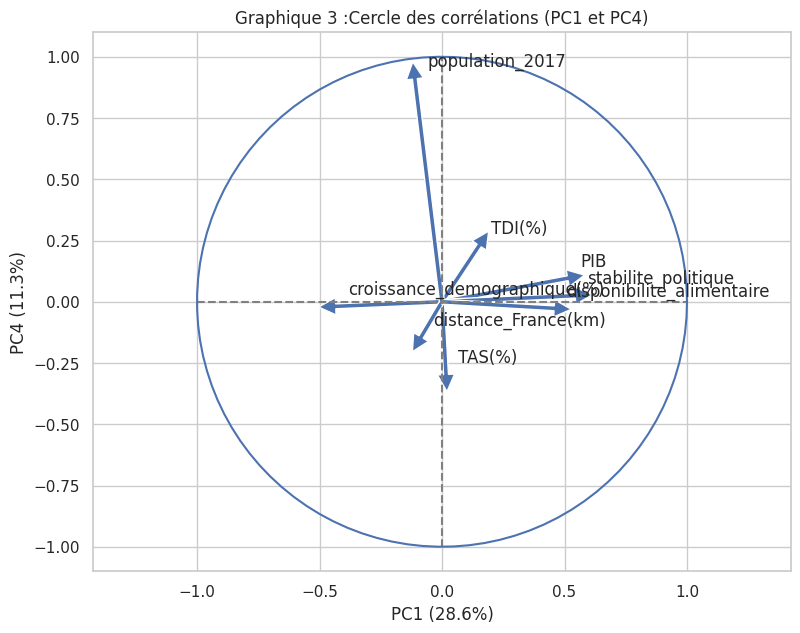

In [296]:
# PC1 et PC4 (~ 40%)

correlation_graph(pca, (0,3), features)


Cette analyse a permis de représenter les données en 2D (base orthonormée) et de comprendre un peu mieux nos variables, et voir le plan avec le plus grand pourcentage pour représenter nos données.

#### d. Représentation des individus (pays) en 2D /selon les deux premières composantes principales

In [297]:
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
 # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Paired')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Graphique 6 : Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

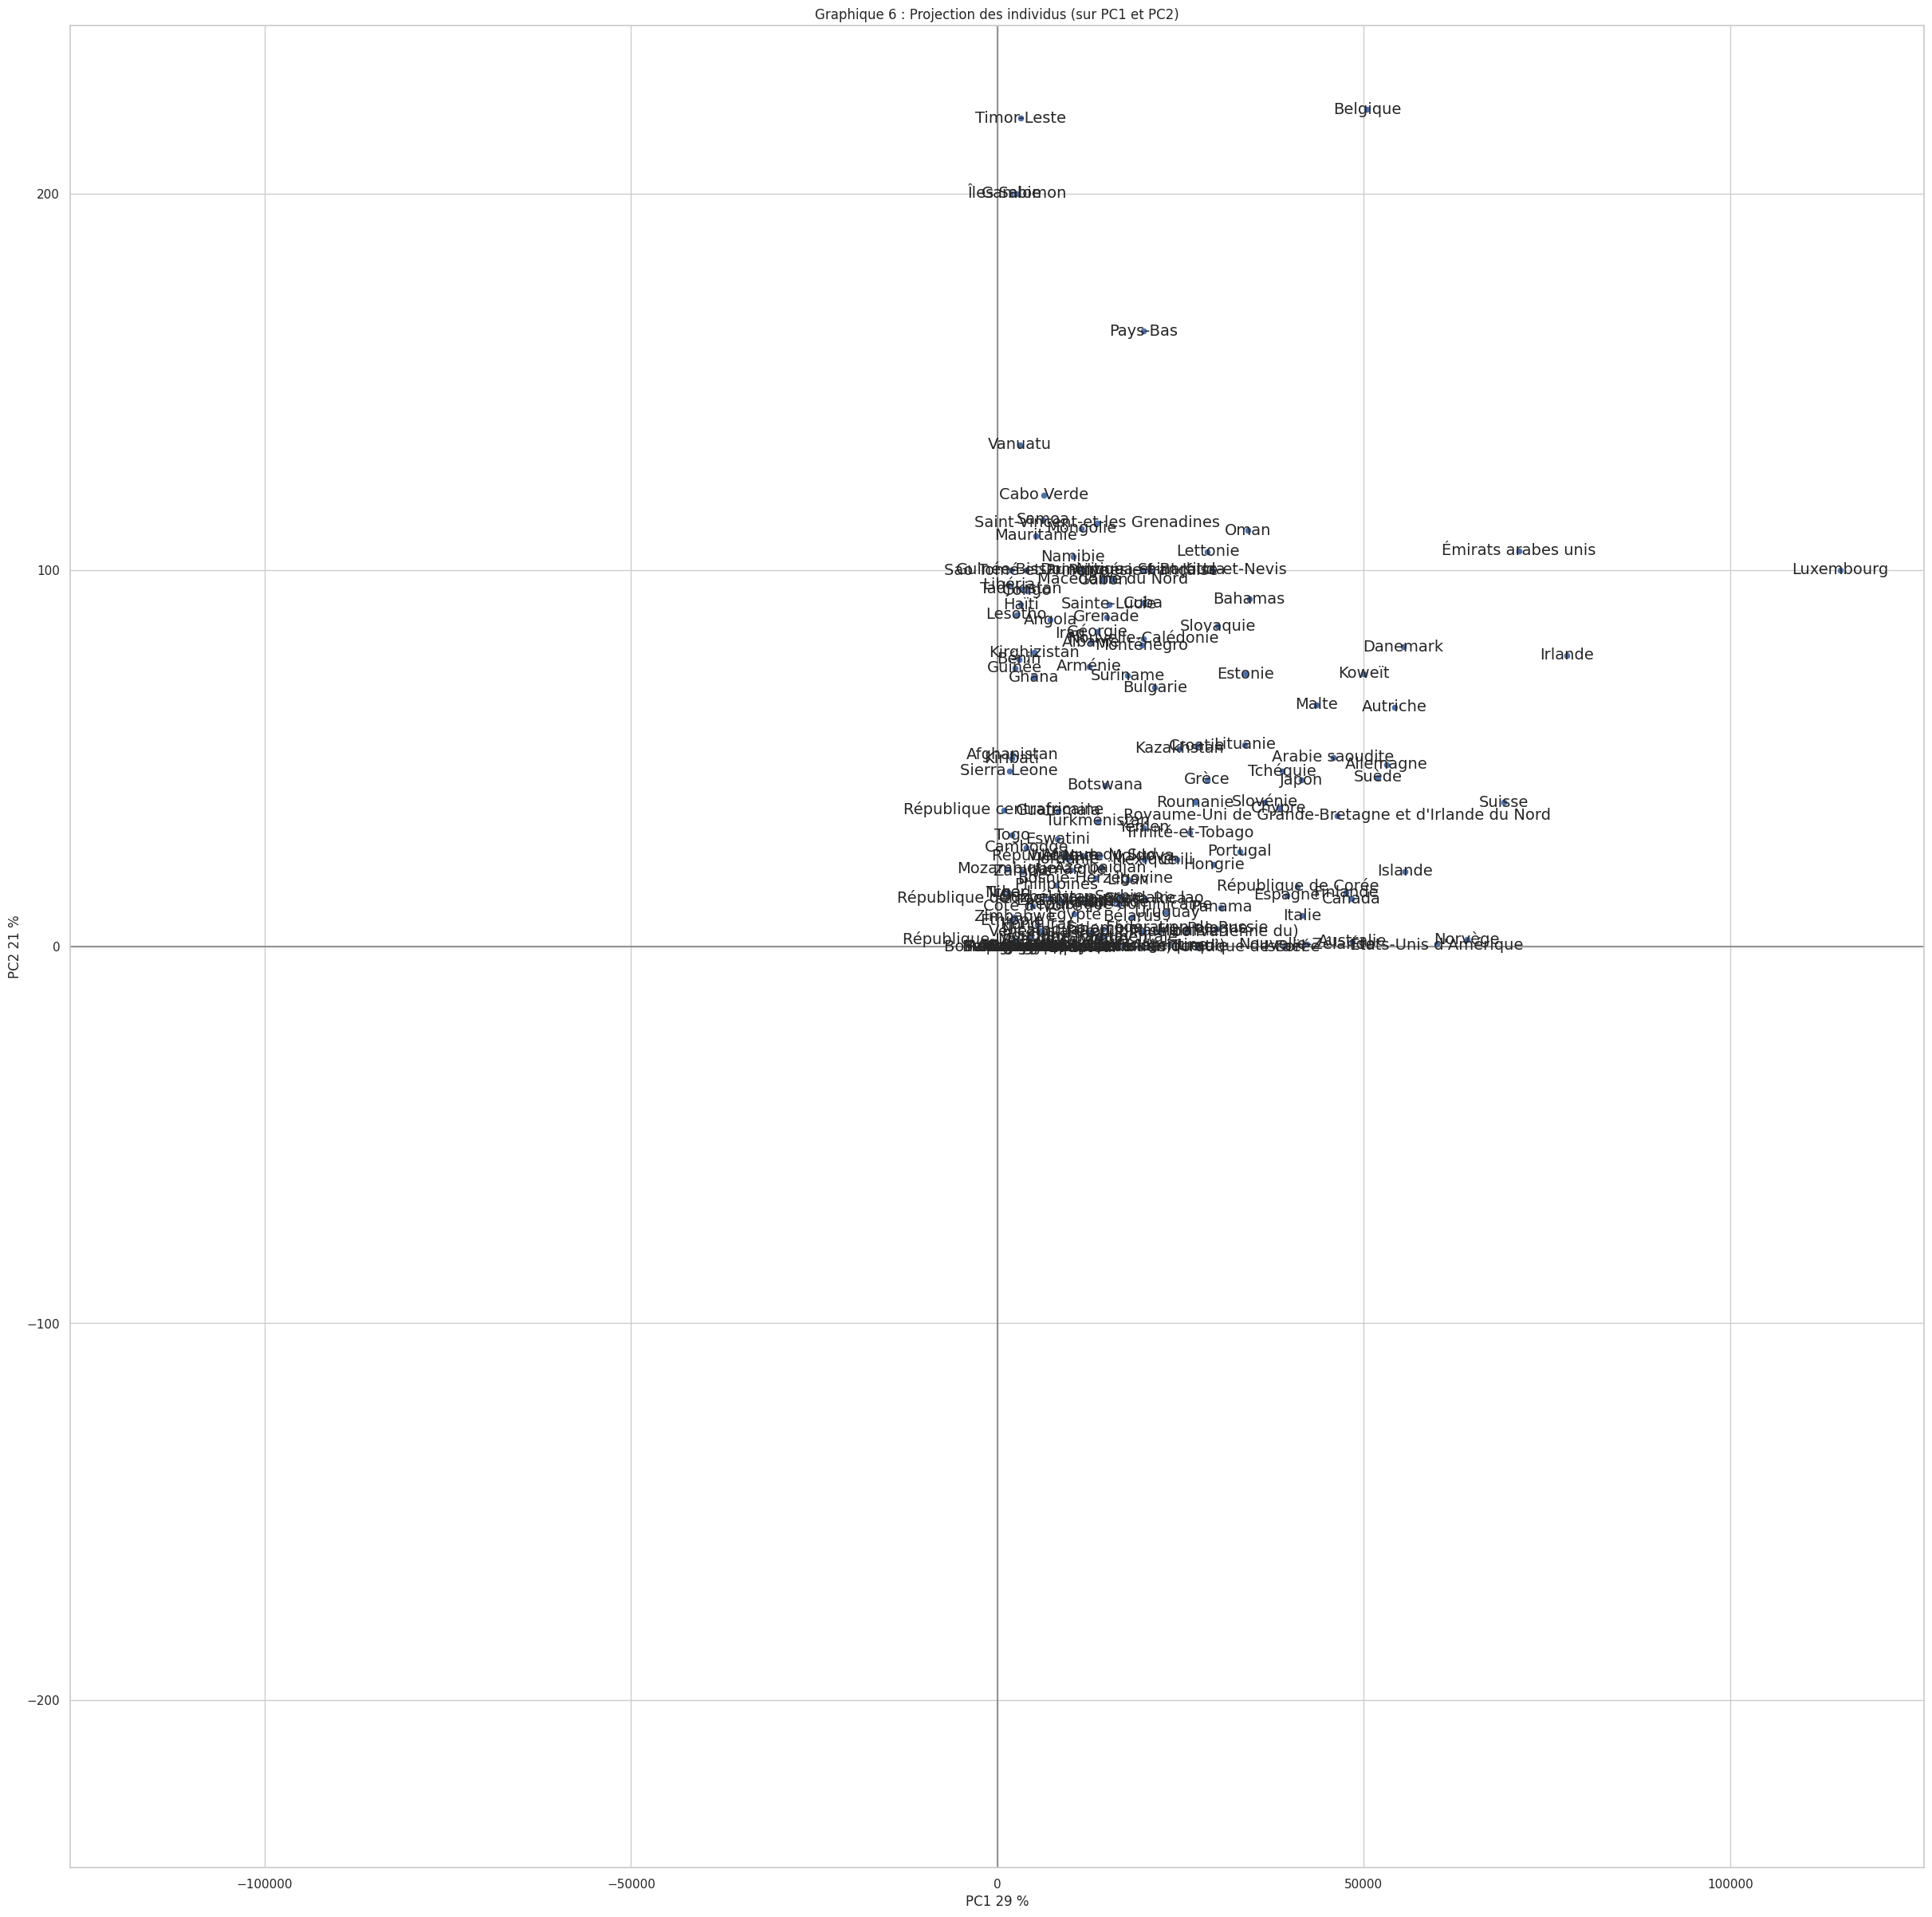

In [298]:
x_y = [0,1]
display_factorial_planes(data, x_y, pca, figsize=(30,30), marker="o", labels = data.index)

#### e. Visualisation des individus (pays) en 2D en fonction de chaque variable

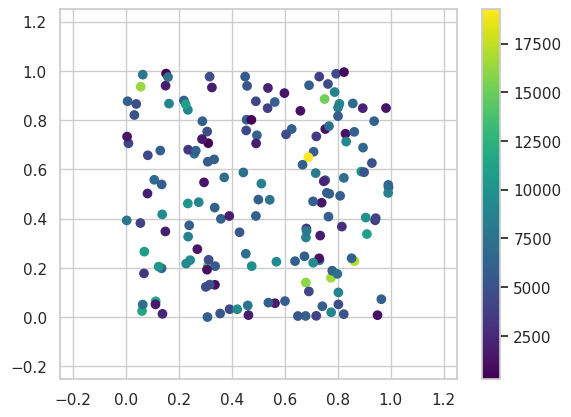

In [299]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction de la distance
X_projected = np.random.rand(len(data), 2)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['distance_France(km)'], cmap='viridis')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

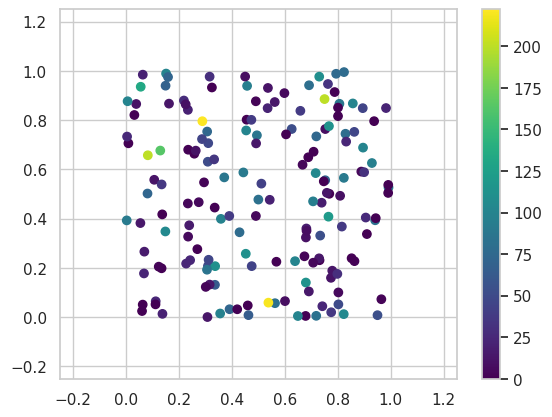

In [300]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction du TDI

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['TDI(%)'], cmap='viridis')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

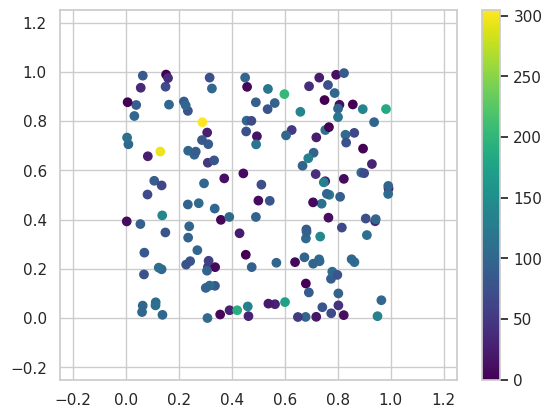

In [301]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction du TAS

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['TAS(%)'], cmap='viridis')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

L'ACP nous a permis de :

Représenter les données en deux dimensions ;

Mettre au jour des corrélations entre des variables

Etablir des profils des pays


### 3.2 Clustering : groupages par pays (lignes)

#### 3.2.1.Classification ascendante hiérarchique (CAH)


Le clustering permet de partitionner un jeu de données en sous-groupes d'observations similaires afin de mieux les comprendre. On va utiliser 2 méthodes : CAH et K-means

CAH : pemet de segmenter les données de manière hiérarchique, pour faciliter leur interprétation.

K-Means utilise le coude pour déterminer le nombre de clusters.



In [302]:
# Création d'une Matrice des liens selon la Méthode de Ward

Z = linkage(X_scaled, method = 'ward', metric = 'euclidean')

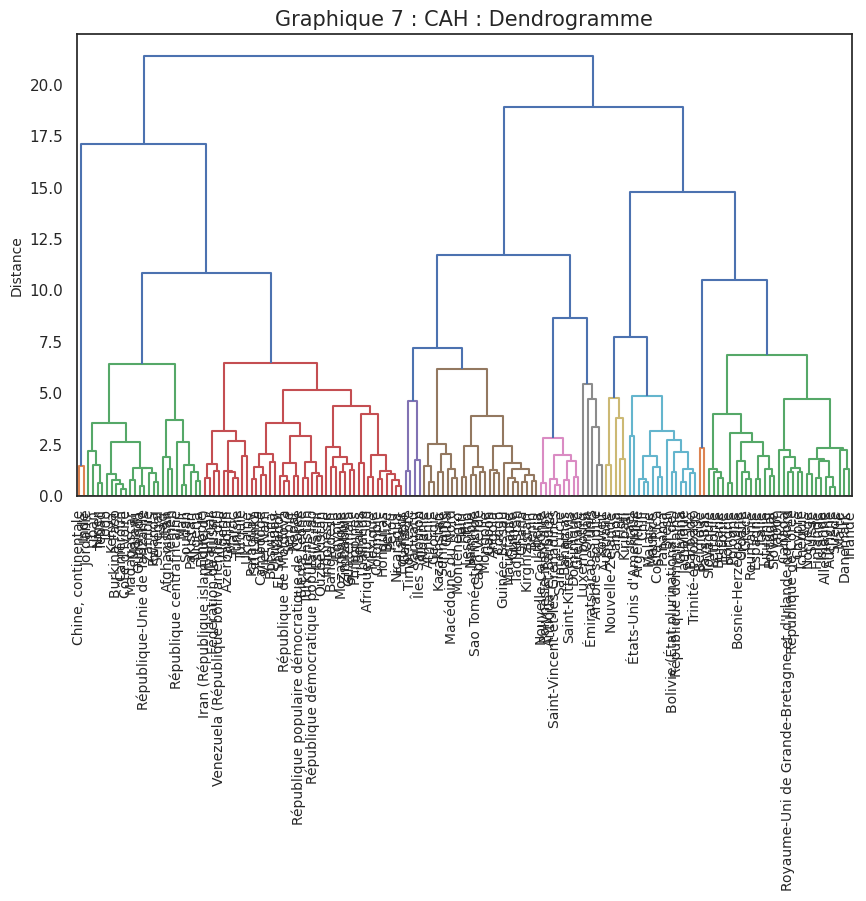

In [303]:
# Affichage du dendrogramme entier pour avoir une première vue des clusters/7

fig =plt.figure(figsize=(10,6))
sns.set_style('white')
plt.title("Graphique 7 : CAH : Dendrogramme", fontsize = 15)
plt.ylabel('Distance', fontsize=10)
plt.axhline(linewidth = 2, color = "dimgray", linestyle = "-.")
dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

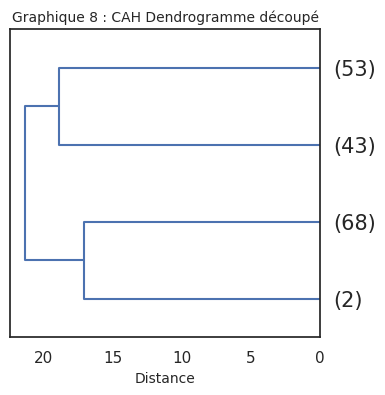

In [304]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement (5 clusters par exemple)/ 8

fig = plt.figure(figsize=(4,4))
plt.title('Graphique 8 : CAH Dendrogramme découpé', fontsize = 10)
plt.xlabel('Distance', fontsize=10)
dendrogram(Z, labels = data.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

Avec le CAH on identifie plusieurs clusters distincts.
Utilisons la méthode du KMeans pour déterminer le nombre max de clusters.

#### 3.2.2.Méthode de KMeans


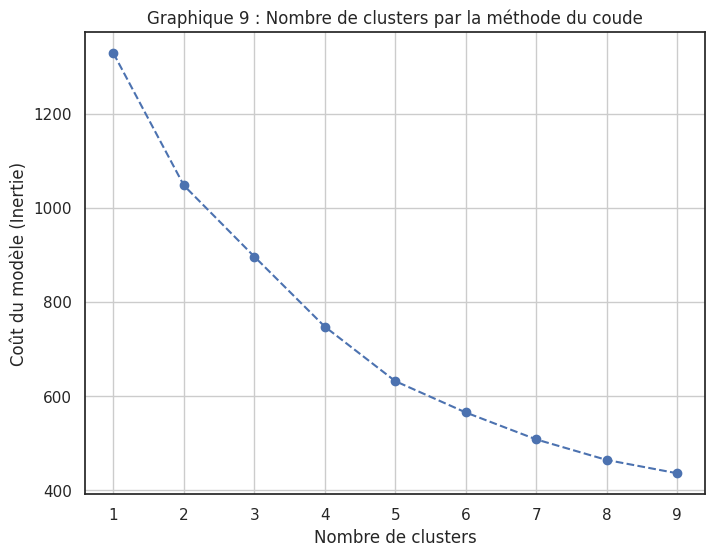

In [305]:
# Recherche du nombre de clusters par la méthode du coude /9

inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(model.inertia_)

# Affichage du graphique de la méthode du coude
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertie)')
plt.title('Graphique 9 : Nombre de clusters par la méthode du coude')
plt.grid(True)
plt.show()

On peut dire qu'à partir de 3 ou 4 clusters, l'ajout de clusters supplémentaires n'apporte plus de gain significatif en termes de réduction de l'inertie.

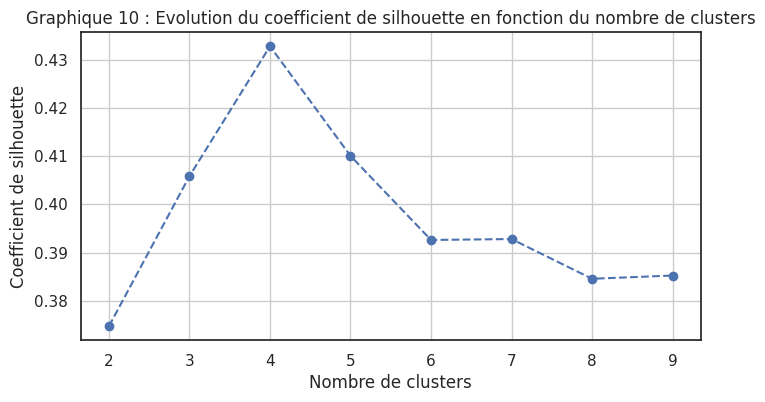

In [306]:
# Recherche du coefficient de silhouette

tab_silhouette = []
k_range = range(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k)
    cluster_labels = model.fit_predict(X_projected)
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    tab_silhouette.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
fig = plt.figure(figsize=(8, 4))
plt.plot(k_range, tab_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Graphique 10 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
plt.grid()
plt.show()

Avec le CAH, on a 4 clusters.

Avec la méthode du coude, on a l'impression qu'il y a stagnation à 4 clusters.

Continuons avec 4 clusters

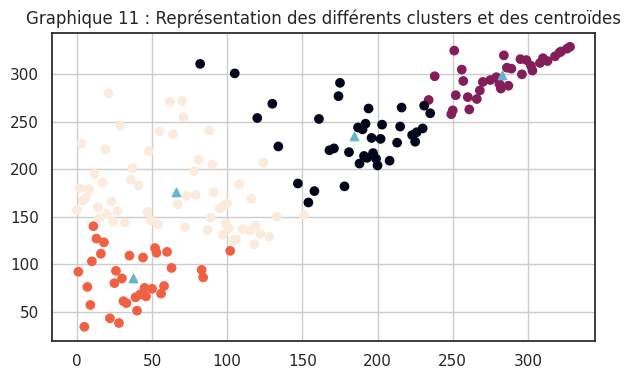

Inertie totale : 399511.71721706324


In [307]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

fig = plt.figure(figsize=(7,4))
model = KMeans(n_clusters=4)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.title('Graphique 11 : Représentation des différents clusters et des centroïdes')
plt.grid()
plt.show()
print('Inertie totale :', model.inertia_)

#### 3.2.3.Identification des clusters

In [308]:
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,5.0
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,85.0


In [309]:
# Identification des clusters

groupes_cah1 = fcluster(Z, 4, criterion='maxclust')

# index triés des groupes
idg1 = np.argsort(groupes_cah1)

# Affichage des pays selon leurs groupes

df = pd.DataFrame(data.index[idg1], groupes_cah1[idg1]).reset_index()
df1 = df.rename(columns={'index':'Groupe'})
df1.head()

,Groupe,Zone
0,1,"Chine, continentale"
1,1,Inde
2,2,Afghanistan
3,2,Ouzbékistan
4,2,Pakistan


In [310]:
# Intégration des références des groupes dans notre échantillon de départ : Jointure avec le df data

dataf1 = pd.merge(data, df1, on='Zone')
dataf1.set_index('Zone', inplace=True)
dataf1.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.3810,36296.113,-2.80,5.0,2
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.5520,57009.756,-0.28,143.0,2
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.5340,2884.169,0.38,85.0,3
Algérie,11809.5,0.722022,99.277978,0.107140,1340.3900,41389.189,-0.92,22.0,2
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,4


In [311]:
# Nombre de pays par groupes

dataf1["Groupe"].value_counts()

Groupe
2    68
4    53
3    43
1     2
Name: count, dtype: int64

In [312]:
# Cluster 1

cluster1 = dataf1.loc[dataf1['Groupe']==1]
cluster1.sort_values(by='TDI(%)', ascending = False)
cluster1

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
"Chine, continentale",14243.5,2.48885,100.412973,0.026597,6012.847299,1421021.791,-0.077771,59.0,1
Inde,6112.1,0.00000,96.831467,0.057590,6594.230000,1338676.785,-0.760000,7.0,1


In [313]:
# Cluster 2

cluster2 = dataf1.loc[dataf1['Groupe']==2]
cluster2.sort_values(by='TDI(%)', ascending = False)
cluster2.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2096.1,50.877193,49.122807,0.164779,5590.381,36296.113,-2.80,5.0,2
Afrique du Sud,13950.5,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0,2
Algérie,11809.5,0.722022,99.277978,0.107140,1340.390,41389.189,-0.92,22.0,2
Azerbaïdjan,14121.4,20.930233,80.620155,0.062671,3817.547,9845.320,-0.75,44.0,2
Bangladesh,4830.8,0.000000,99.600000,0.057479,7916.790,159685.424,-1.26,7.0,2


In [314]:
# Cluster 3

cluster3 = dataf1.loc[dataf1['Groupe']==3]
cluster3.sort_values(by='TDI(%)', ascending = False)
cluster3.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Albanie,12771.0,80.851064,27.659574,-0.010270,1603.534,2884.169,0.38,85.0,3
Angola,7216.1,86.833856,13.166144,0.187544,6510.322,29816.766,-0.38,35.0,3
Antigua-et-Barbuda,20777.9,100.000000,0.000000,0.055492,6708.770,95.426,0.75,233.0,3
Arabie saoudite,45795.5,50.313589,42.926829,0.135356,4694.500,33101.179,-0.64,151.0,3
Arménie,12509.6,74.468085,23.404255,0.020996,3434.071,2944.791,-0.62,54.0,3


In [315]:
# Cluster 4

cluster4 = dataf1.loc[dataf1['Groupe']==4]
cluster4.sort_values(by='TDI(%)', ascending = False)
cluster4.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,4
Argentine,23597.1,0.407747,110.142712,0.052256,11072.2500,43937.140,0.17,182.0,4
Australie,48400.2,1.366354,108.368915,0.073379,16975.4600,24584.620,0.90,192.0,4
Autriche,54173.0,63.583815,85.549133,0.037364,1035.1440,8819.901,1.05,65.0,4
Barbade,16199.0,11.764706,88.235294,0.008921,6882.3400,286.232,0.97,199.0,4


In [316]:
# Cluster 5

cluster5 = dataf1.loc[dataf1['Groupe']==5]
cluster5.sort_values(by='TDI(%)', ascending = False)
cluster5.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,


#### 3.2.4. Comparaison des groupes

In [317]:
# Afficher les moyennes des variables de chaque groupe

groupe=(1,2,3,4)
for n in groupe:
    affi=dataf1.loc[dataf1['Groupe']==n].mean()
    print(affi)

PIB                            1.017780e+04
TDI(%)                         1.244425e+00
TAS(%)                         9.862222e+01
croissance_demographique(%)    4.209347e-02
distance_France(km)            6.303539e+03
population_2017                1.379849e+06
stabilite_politique           -4.188855e-01
disponibilite_alimentaire      3.300000e+01
Groupe                         1.000000e+00
dtype: float64
PIB                             9032.241988
TDI(%)                            12.399335
TAS(%)                            94.002655
croissance_demographique(%)        0.094549
distance_France(km)             6399.948973
population_2017                42583.659338
stabilite_politique               -0.760441
disponibilite_alimentaire         40.294118
Groupe                             2.000000
dtype: float64
PIB                            17070.601284
TDI(%)                            99.576781
TAS(%)                            19.217794
croissance_demographique(%)        0.091276
di

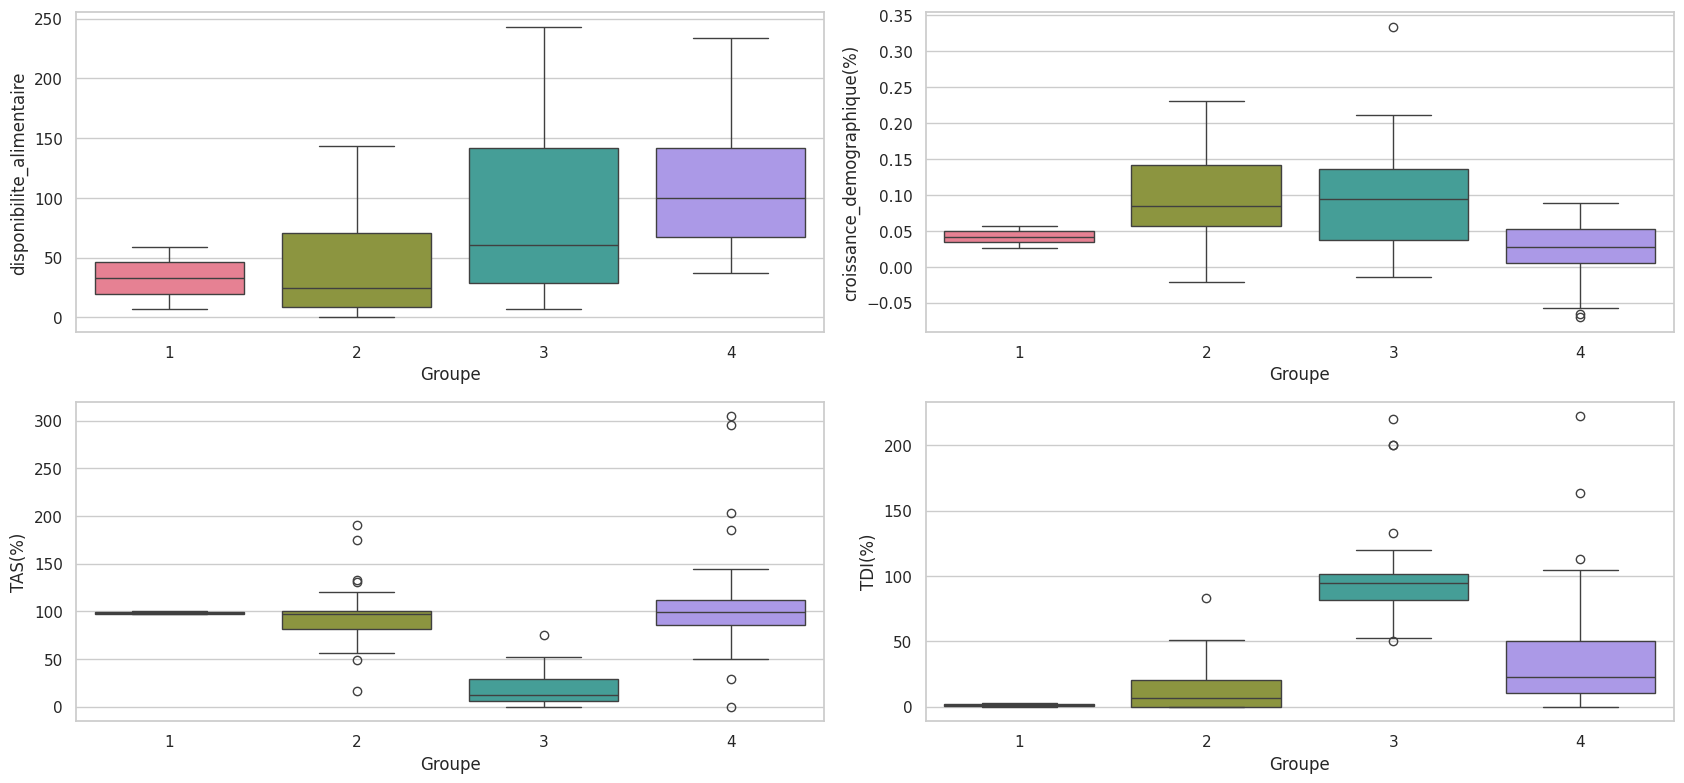

In [318]:
# Comparaison visuelle des Box-plots des variables des clusters

plt.figure(figsize=(17, 8))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf1['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf1, x='Groupe', y='disponibilite_alimentaire', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf1, x='Groupe', y='croissance_demographique(%)', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf1, x='Groupe', y='TAS(%)', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf1, x='Groupe', y='TDI(%)', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

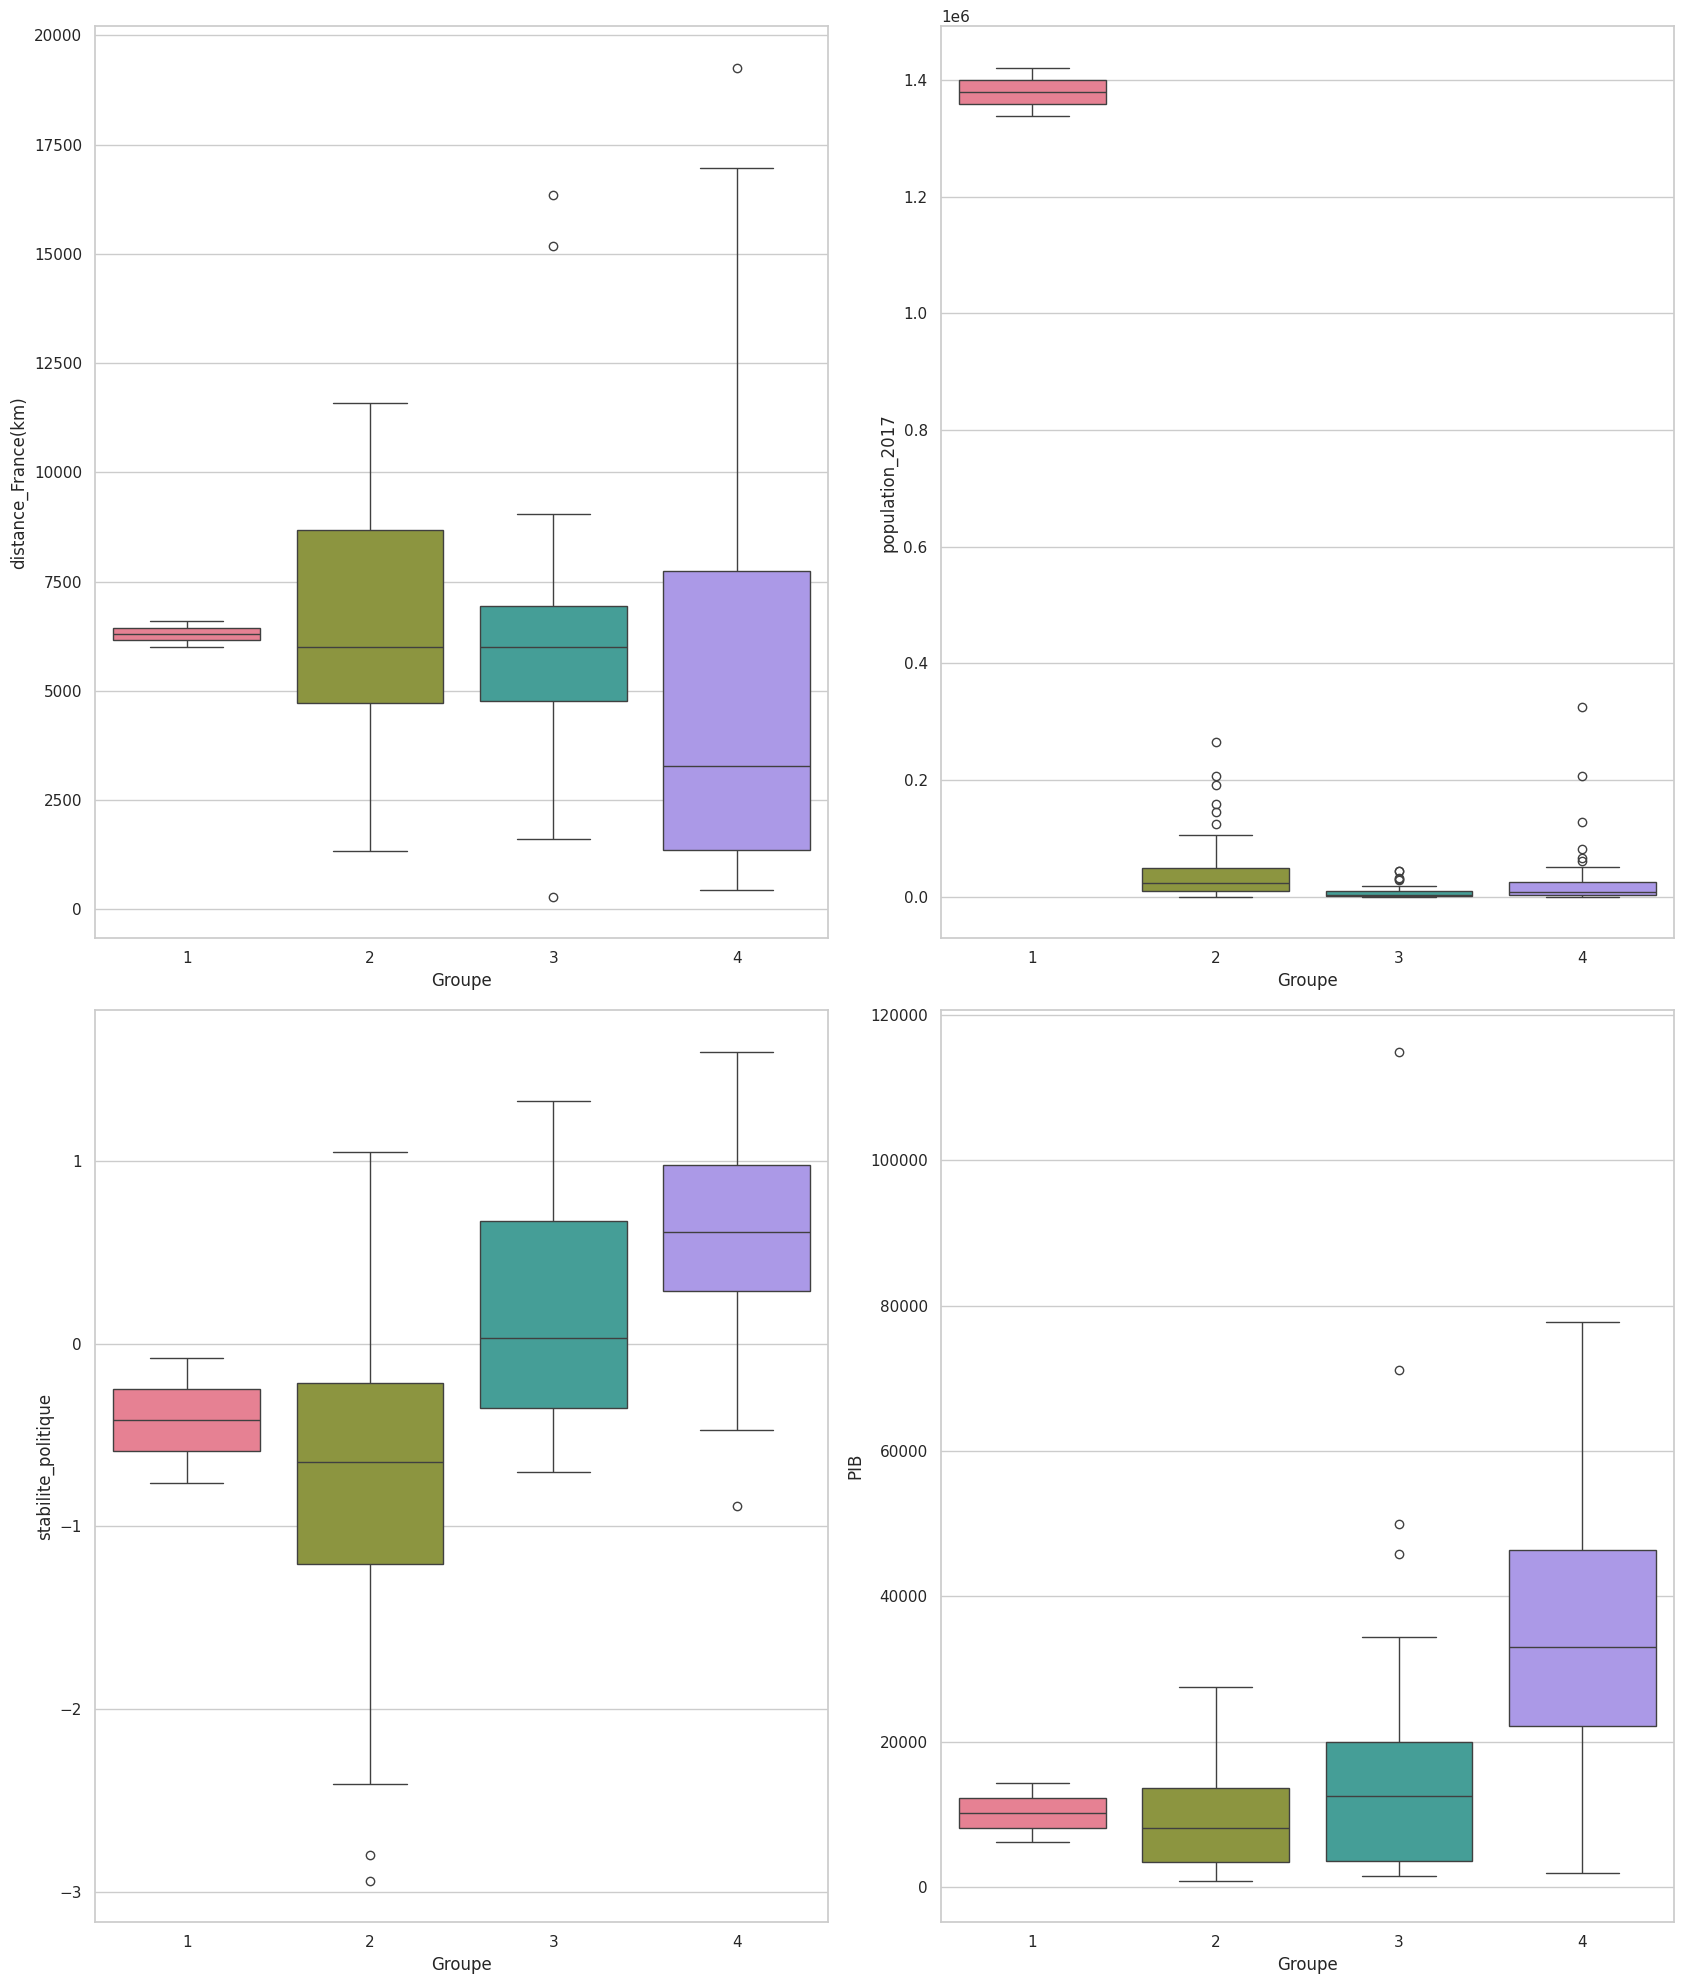

In [319]:
# Comparaison visuelle des Box-plots des variables des clusters

plt.figure(figsize=(17, 20))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf1['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf1, x='Groupe', y='distance_France(km)', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf1, x='Groupe', y='population_2017', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf1, x='Groupe', y='stabilite_politique', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf1, x='Groupe', y='PIB', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

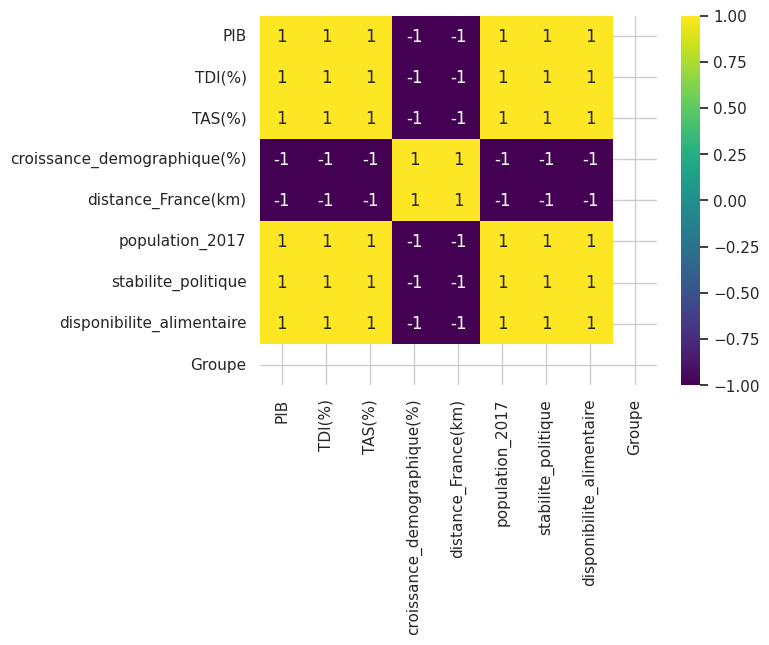

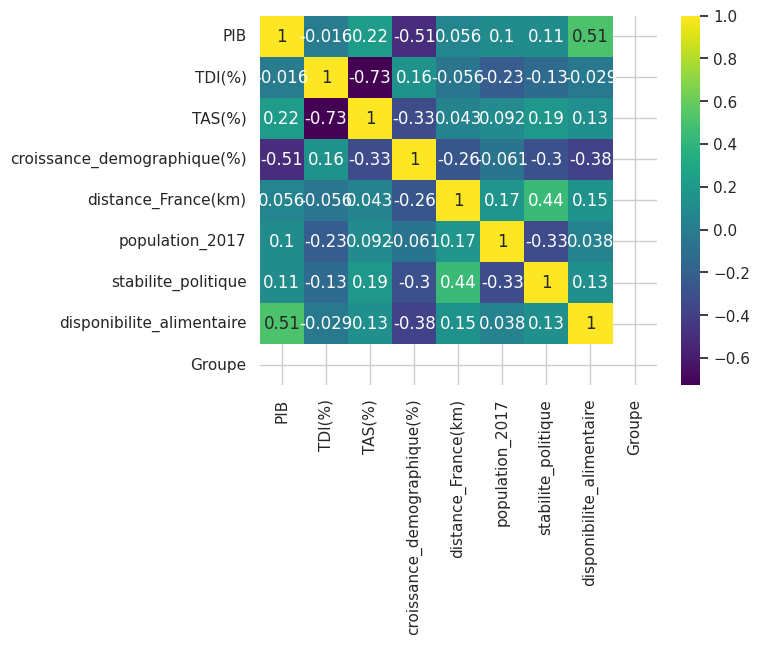

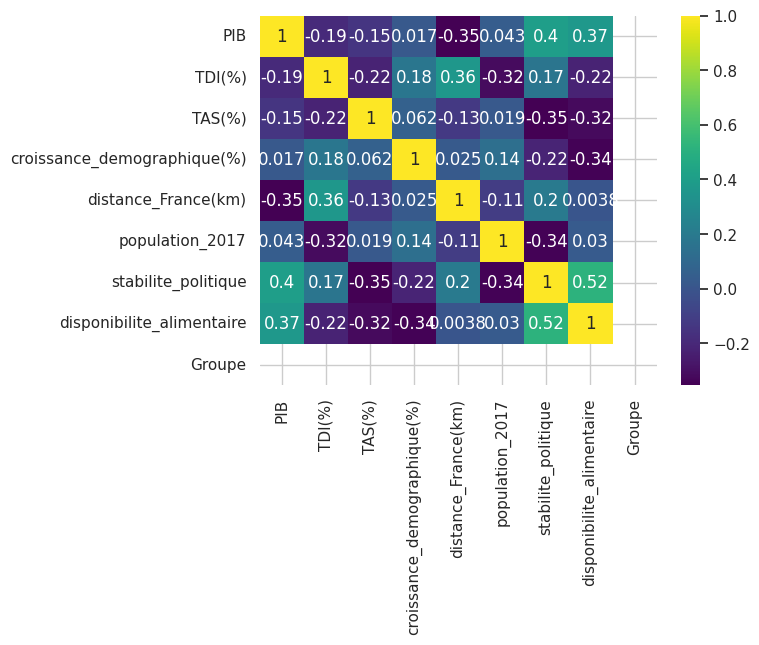

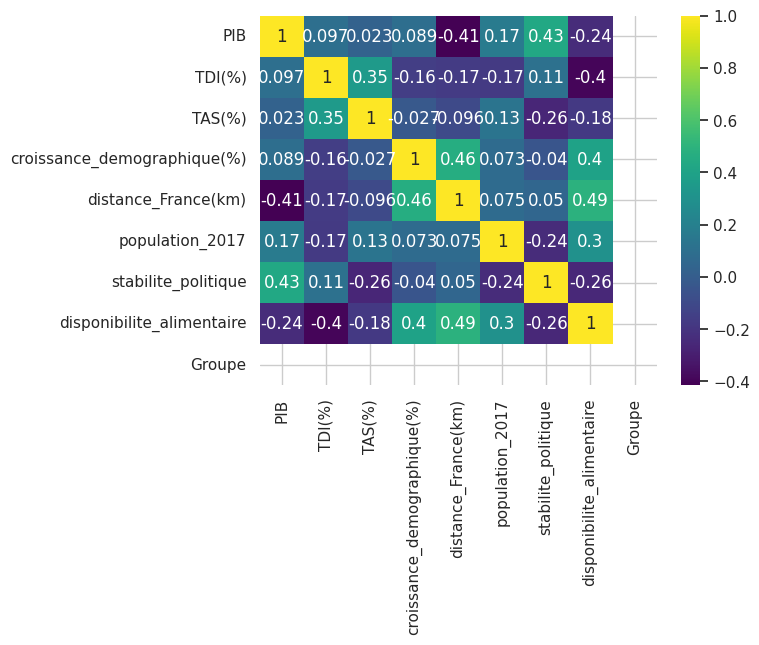

In [320]:
# Comparaison heatmap de corrélations entre les différentes variables dans chaque cluster

groupe=(cluster1, cluster2, cluster3, cluster4)
for n in groupe:
    #df_norm_col=(n-n.mean())/n.std()
    sns.heatmap(n.corr(),cmap='viridis', annot = True)
    plt.show()

## 4 Analyse du cluster 4

In [321]:
# Affichage

cluster4.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,4
Argentine,23597.1,0.407747,110.142712,0.052256,11072.2500,43937.140,0.17,182.0,4
Australie,48400.2,1.366354,108.368915,0.073379,16975.4600,24584.620,0.90,192.0,4
Autriche,54173.0,63.583815,85.549133,0.037364,1035.1440,8819.901,1.05,65.0,4
Barbade,16199.0,11.764706,88.235294,0.008921,6882.3400,286.232,0.97,199.0,4


### 4.1 Affichage des individus en 2D (2PCP)

In [322]:
# Suppression d'une colonne

cluster4 = cluster4.drop(columns = ['Groupe'])

In [323]:
cluster4.T

Zone,Allemagne,Argentine,Australie,Autriche,Barbade,Belgique,Bolivie (État plurinational de),Bosnie-Herzégovine,Brésil,Bulgarie,...,République de Corée,République dominicaine,Samoa,Slovaquie,Slovénie,Suisse,Suède,Tchéquie,Trinité-et-Tobago,États-Unis d'Amérique
PIB,53071.500000,23597.100000,48400.200000,54173.000000,16199.000000,50442.300000,8244.900000,13400.000000,14477.900000,21470.000000,...,40957.400000,16524.500000,6238.800000,30061.600000,36507.600000,69103.600000,51948.000000,38824.900000,26213.900000,59914.800000
TDI(%),48.418631,0.407747,1.366354,63.583815,11.764706,222.368421,0.233100,18.181818,0.030054,68.789809,...,16.042155,11.200000,113.333333,85.135135,38.461538,38.345865,44.919786,46.586345,30.263158,0.673382
TAS(%),87.061530,110.142712,108.368915,85.549133,88.235294,304.605263,124.242424,110.909091,142.266079,68.152866,...,98.126464,90.400000,0.000000,95.945946,138.461538,68.421053,83.957219,65.461847,80.263158,119.971532
croissance_demographique(%),0.020819,0.052256,0.073379,0.037364,0.008921,0.030165,0.078551,-0.070305,0.042885,-0.031573,...,0.020690,0.058624,0.033122,0.006096,0.009025,0.055918,0.037943,0.005646,0.029179,0.035157
distance_France(km),439.898400,11072.250000,16975.460000,1035.144000,6882.340000,6012.847299,6012.847299,1352.463000,9408.406000,1760.707000,...,6012.847299,6012.847299,16011.920000,1094.610000,965.736600,436.077800,1545.797000,6012.847299,7225.325000,5838.157000
population_2017,82658.409000,43937.140000,24584.620000,8819.901000,286.232000,11419.748000,11192.855000,3351.525000,207833.823000,7102.444000,...,51096.415000,10513.104000,195.352000,5447.900000,2076.394000,8455.804000,9904.896000,10641.034000,1384.059000,325084.756000
stabilite_politique,0.590000,0.170000,0.900000,1.050000,0.970000,0.430000,-0.280000,-0.350000,-0.470000,0.330000,...,0.390000,0.160000,1.180000,0.910000,0.870000,1.260000,0.980000,1.000000,0.280000,0.290000
disponibilite_alimentaire,71.000000,182.000000,192.000000,65.000000,199.000000,44.000000,155.000000,56.000000,204.000000,81.000000,...,62.000000,123.000000,217.000000,48.000000,83.000000,55.000000,61.000000,82.000000,189.000000,219.000000


In [324]:
# Renommer

groupe2 = cluster4
groupe2.shape

(53, 8)

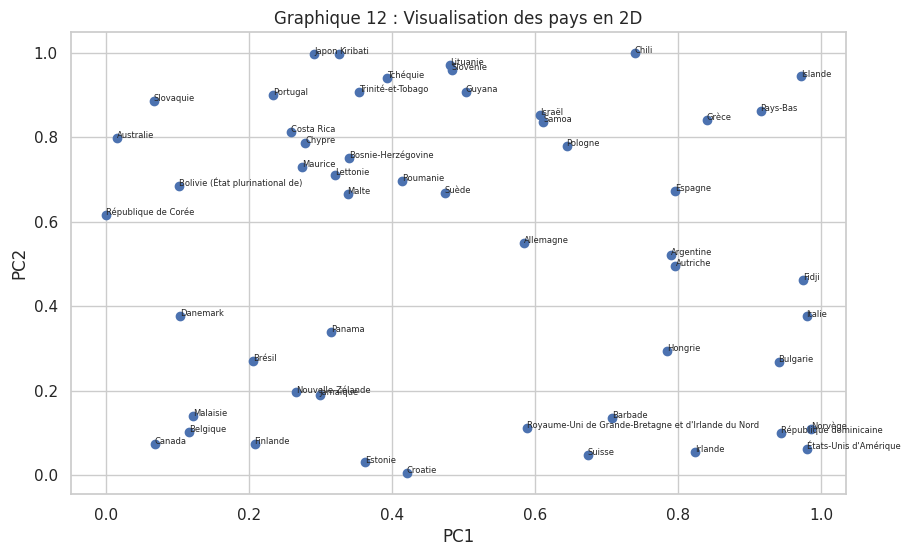

In [325]:
# Projection de X sur les composantes principales
# Assurez-vous que X_projection est un tableau numpy avec deux dimensions

X_projected2 = np.random.rand(len(groupe2), 2)
# Création de la figure et du scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_projected2[:, 0], X_projected2[:, 1])

# Ajout des annotations

for (x, y), label in zip(X_projected2, groupe2.index):
    plt.text(x, y, label, fontsize=6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Graphique 12 : Visualisation des pays en 2D')
plt.show()

### 4.2 Nouvelle itération : Coude et Silhouette

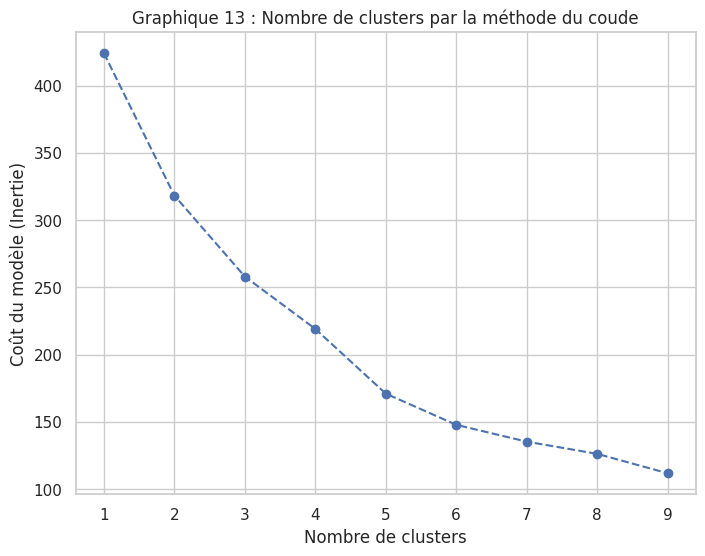

In [326]:
# Recherche du nombre de clusters par la méthode du coude

Y = groupe2.values

# centrer et réduire les données
std_scale2 = preprocessing.StandardScaler().fit(Y)
X_scaled2 = std_scale2.transform(Y)

# création d'une Matrice des liens selon la Méthode de Ward
Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')

# Recherche du nombre de clusters par la méthode du coude

inertia2 = []
k_range2 = range(1, 10)
for k in k_range2:
    model2 = KMeans(n_clusters=k, random_state=42).fit(X_scaled2)
    inertia2.append(model2.inertia_)

# Affichage du graphique de la méthode du coude
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range2, inertia2, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertie)')
plt.title('Graphique 13 : Nombre de clusters par la méthode du coude')
plt.grid(True)
plt.show()

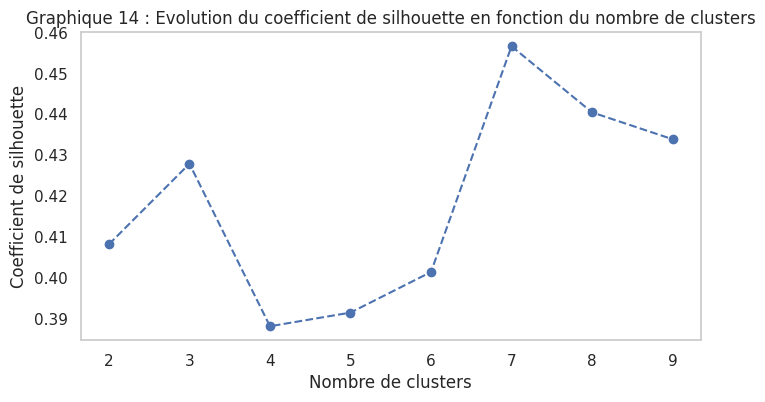

[0.4081698248868878,
 0.42790874138932344,
 0.388089580503435,
 0.3914367728159579,
 0.4013807695915597,
 0.45669162774775657,
 0.44048918503580864,
 0.433910219457136]

In [327]:
# Recherche du coefficient de silhouette

X_projected2 = np.random.rand(len(groupe2), 2)
tab_silhouette2 = []
k_range2 = range(2, 10)
for k in k_range2:
    model2 = KMeans(n_clusters=k)
    cluster_labels = model2.fit_predict(X_projected2)
    silhouette_avg = silhouette_score(X_projected2, cluster_labels)
    tab_silhouette2.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
fig = plt.figure(figsize=(8, 4))
plt.plot(k_range2, tab_silhouette2, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Graphique 14 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
plt.grid()
plt.show()

# Afficher les valeurs des coefficients de silhouette
tab_silhouette2

### 4.3 Représentations visuelles

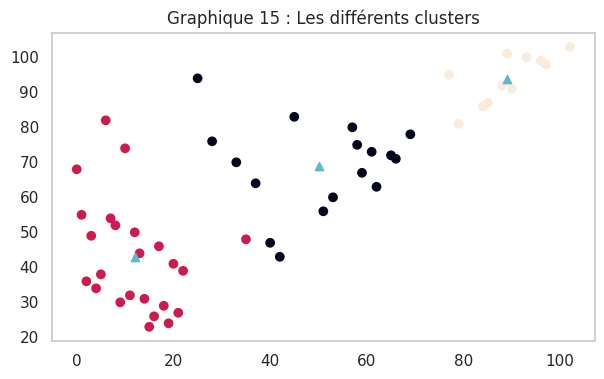

Inertie totale : 16271.319726724534


In [328]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

fig = plt.figure(figsize=(7,4))
model2 = KMeans(n_clusters=3)
model2.fit(Z2)
model2.predict(Z2)
plt.scatter(Z2[:,0], Z2[:,1],c=model2.predict(Z2))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], marker='^',c='c')
plt.title('Graphique 15 : Les différents clusters')
plt.grid()
plt.show()
print('Inertie totale :', model2.inertia_)

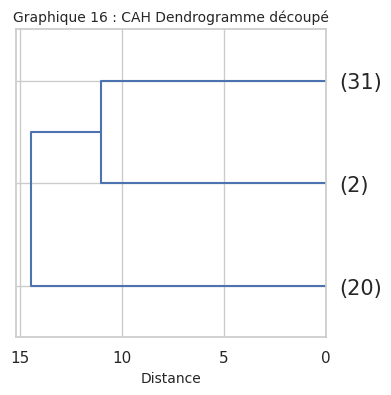

In [329]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement

fig = plt.figure(figsize=(4,4))
plt.title('Graphique 16 : CAH Dendrogramme découpé', fontsize = 10)
plt.xlabel('Distance', fontsize=10)
dendrogram(Z2, labels = groupe2.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

### 4.4 Identification des nouveaux clusters

In [330]:
# Identification des clusters

groupes_cah2 = fcluster(Z2, 3, criterion='maxclust')

# index triés des groupes
idg2 = np.argsort(groupes_cah2)

# Affichage des pays selon leurs groupes
df = pd.DataFrame(groupe2.index[idg2], groupes_cah2[idg2]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

,Groupe,Zone
0,1,États-Unis d'Amérique
1,1,Kiribati
2,1,Nouvelle-Zélande
3,1,Jamaïque
4,1,Trinité-et-Tobago


In [331]:
# Intégration des références des groupes dans notre cluster

dataf2 = pd.merge(groupe2, df2, on='Zone')
dataf2.set_index('Zone', inplace=True)
dataf2.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,3
Argentine,23597.1,0.407747,110.142712,0.052256,11072.2500,43937.140,0.17,182.0,1
Australie,48400.2,1.366354,108.368915,0.073379,16975.4600,24584.620,0.90,192.0,1
Autriche,54173.0,63.583815,85.549133,0.037364,1035.1440,8819.901,1.05,65.0,3
Barbade,16199.0,11.764706,88.235294,0.008921,6882.3400,286.232,0.97,199.0,1


In [332]:
# Nombre de pays par groupes

dataf2["Groupe"].value_counts()

Groupe
3    31
1    20
2     2
Name: count, dtype: int64

In [333]:
# Cluster 1

cluster_1 = dataf2.loc[dataf2['Groupe']==1]
cluster_1.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Samoa,6238.8,113.333333,0.000000,0.033122,16011.920000,195.352,1.18,217.0,1
Kiribati,1962.3,50.000000,50.000000,0.073216,14371.470000,114.158,0.88,63.0,1
Trinité-et-Tobago,26213.9,30.263158,80.263158,0.029179,7225.325000,1384.059,0.28,189.0,1
Chili,24546.9,23.065476,105.952381,0.061498,11663.390000,18470.439,0.42,153.0,1
Jamaïque,9984.6,20.394737,84.210526,0.027696,7734.696000,2920.848,0.31,178.0,1
Costa Rica,20168.2,12.686567,99.253731,0.055878,8919.449000,4949.954,0.61,92.0,1
Barbade,16199.0,11.764706,88.235294,0.008921,6882.340000,286.232,0.97,199.0,1
Fidji,12822.0,11.538462,88.461538,0.014323,16595.080000,877.459,0.62,97.0,1
République dominicaine,16524.5,11.200000,90.400000,0.058624,6012.847299,10513.104,0.16,123.0,1


In [334]:
# Cluster 2

cluster_2 = dataf2.loc[dataf2['Groupe']==2]
cluster_2.sort_values(by='TDI(%)', ascending = False)
cluster_2.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Belgique,50442.300000,222.368421,304.605263,0.030165,6012.847299,11419.748000,0.430000,44.0,2
Pays-Bas,19924.718405,163.440860,295.698925,0.071514,6012.847299,43968.249952,-0.077771,70.0,2


In [335]:
# Cluster 3

cluster_3 = dataf2.loc[dataf2['Groupe']==3]
cluster_3.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Lettonie,28673.6,104.878049,80.487805,-0.056993,1704.598000,1951.097,0.46,72.0,3
Slovaquie,30061.6,85.135135,95.945946,0.006096,1094.610000,5447.900,0.91,48.0,3
Danemark,55356.7,79.640719,103.592814,0.021631,1027.609000,5732.274,0.87,112.0,3
Irlande,77749.2,77.343750,85.937500,0.031483,778.203100,4753.279,1.00,100.0,3
Estonie,33821.9,72.413793,68.965517,-0.002848,1859.091000,1319.390,0.65,86.0,3
Bulgarie,21470.0,68.789809,68.152866,-0.031573,1760.707000,7102.444,0.33,81.0,3
Malte,43508.8,64.285714,28.571429,0.038226,1752.693000,437.933,1.25,103.0,3
Autriche,54173.0,63.583815,85.549133,0.037364,1035.144000,8819.901,1.05,65.0,3
Lituanie,33761.9,53.658537,143.902439,-0.065718,1700.296000,2845.414,0.78,96.0,3


### 4.5 Comparaison des sous-groupes

In [336]:
# Comparaison des groupes : Afficher les moyennes des variables de chaque groupe

groupe=(1,2,3)
for n in groupe:
    affi=dataf2.loc[dataf2['Groupe']==n].mean()
    print(affi)

PIB                            23071.930000
TDI(%)                            15.312278
TAS(%)                            96.385952
croissance_demographique(%)        0.048689
distance_France(km)            10155.986980
population_2017                35127.090850
stabilite_politique                0.409500
disponibilite_alimentaire        159.450000
Groupe                             1.000000
dtype: float64
PIB                            35183.509202
TDI(%)                           192.904641
TAS(%)                           300.152094
croissance_demographique(%)        0.050839
distance_France(km)             6012.847299
population_2017                27693.998976
stabilite_politique                0.176114
disponibilite_alimentaire         57.000000
Groupe                             2.000000
dtype: float64
PIB                            41308.616129
TDI(%)                            41.791312
TAS(%)                           101.808808
croissance_demographique(%)        0.005268
di

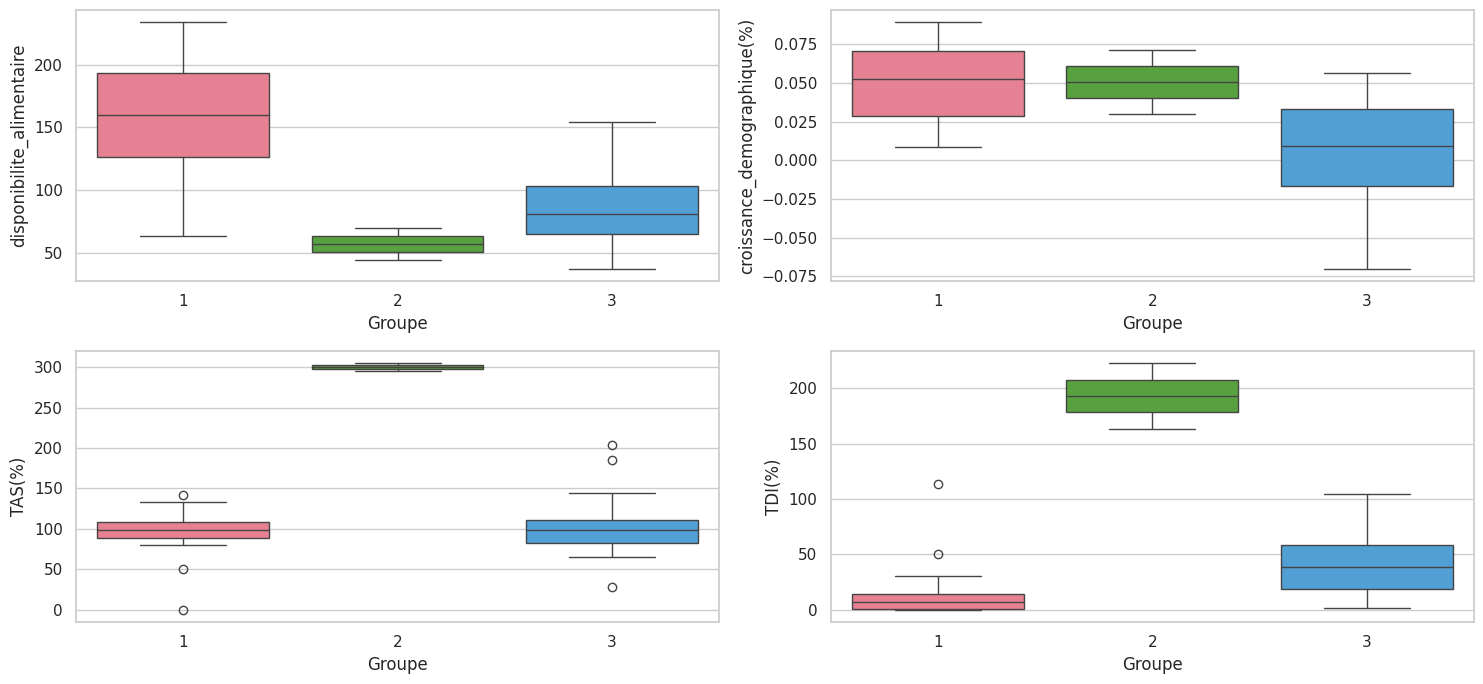

In [337]:
# Comparaison visuelle des Box-plots des variables des clusters

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf2['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf2, x='Groupe', y='disponibilite_alimentaire', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf2, x='Groupe', y='croissance_demographique(%)', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf2, x='Groupe', y='TAS(%)', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf2, x='Groupe', y='TDI(%)', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()
# Afficher le graphique
plt.show()

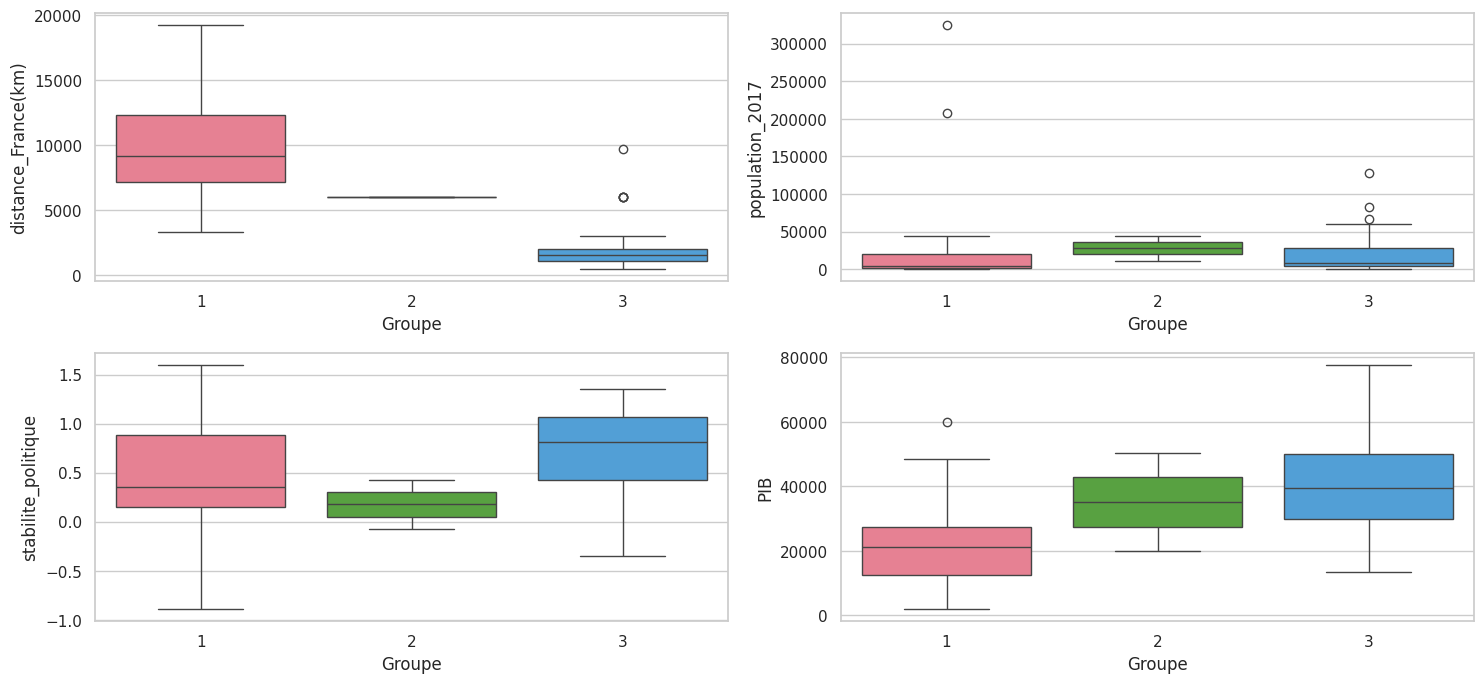

In [338]:
# Comparaison visuelle des Box-plots des variables des clusters

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf2['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf2, x='Groupe', y='distance_France(km)', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf2, x='Groupe', y='population_2017', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf2, x='Groupe', y='stabilite_politique', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf2, x='Groupe', y='PIB', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

## 5 Analyse du sous cluster_3

In [339]:
# Suppression d'une colonne

cluster_3 = cluster_3.drop(columns = ['Groupe'])

In [340]:
# Renommer

groupe3 = cluster_3
groupe3.shape

(31, 8)

In [341]:
# Affichage

groupe3.T

Zone,Allemagne,Autriche,Bosnie-Herzégovine,Bulgarie,Canada,Chypre,Croatie,Danemark,Espagne,Estonie,...,Pologne,Portugal,Roumanie,Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,République de Corée,Slovaquie,Slovénie,Suisse,Suède,Tchéquie
PIB,53071.500000,54173.000000,13400.000000,21470.000000,48317.200000,38415.100000,27207.000000,55356.700000,39528.900000,33821.900000,...,29958.100000,33044.700000,26943.300000,46372.400000,40957.400000,30061.600000,36507.600000,69103.600000,51948.000000,38824.900000
TDI(%),48.418631,63.583815,18.181818,68.789809,12.700628,36.842105,53.333333,79.640719,13.694055,72.413793,...,4.757785,25.230769,38.320210,34.870188,16.042155,85.135135,38.461538,38.345865,44.919786,46.586345
TAS(%),87.061530,85.549133,110.909091,68.152866,98.883461,65.789474,135.555556,103.592814,101.202405,68.965517,...,203.373702,111.076923,102.887139,81.199642,98.126464,95.945946,138.461538,68.421053,83.957219,65.461847
croissance_demographique(%),0.020819,0.037364,-0.070305,-0.031573,0.051832,0.039322,-0.026309,0.021631,-0.008831,-0.002848,...,-0.007164,-0.022589,-0.028353,0.034128,0.020690,0.006096,0.009025,0.055918,0.037943,0.005646
distance_France(km),439.898400,1035.144000,1352.463000,1760.707000,6004.645000,2954.551000,1081.762000,1027.609000,1054.656000,1859.091000,...,1368.178000,1452.860000,1875.018000,6012.847299,6012.847299,1094.610000,965.736600,436.077800,1545.797000,6012.847299
population_2017,82658.409000,8819.901000,3351.525000,7102.444000,36732.095000,1179.678000,4182.857000,5732.274000,46647.428000,1319.390000,...,37953.180000,10288.527000,19653.969000,66727.461000,51096.415000,5447.900000,2076.394000,8455.804000,9904.896000,10641.034000
stabilite_politique,0.590000,1.050000,-0.350000,0.330000,1.100000,0.540000,0.690000,0.870000,0.280000,0.650000,...,0.520000,1.120000,0.060000,0.390000,0.390000,0.910000,0.870000,1.260000,0.980000,1.000000
disponibilite_alimentaire,71.000000,65.000000,56.000000,81.000000,154.000000,91.000000,37.000000,112.000000,105.000000,86.000000,...,107.000000,109.000000,66.000000,120.000000,62.000000,48.000000,83.000000,55.000000,61.000000,82.000000


### 5.1 Nouvelle itération : Coude et Silhouette

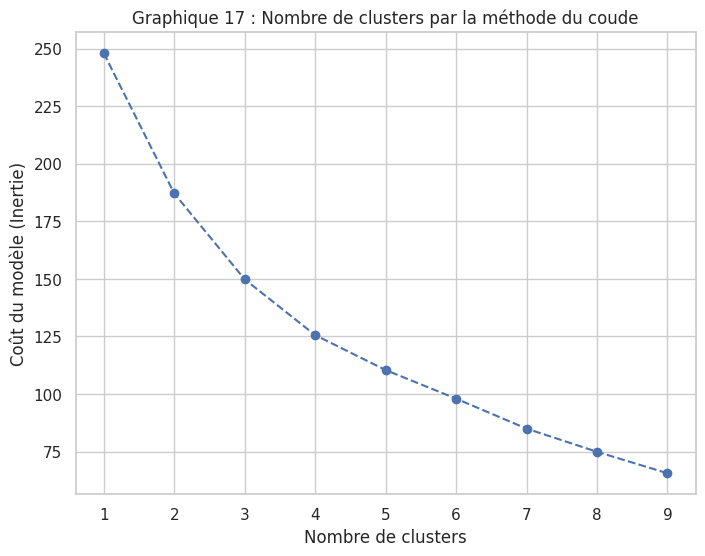

In [342]:
# Recherche du nombre de clusters par la méthode du coude

W = groupe3.values

# centrer et réduire les données
std_scale3 = preprocessing.StandardScaler().fit(W)
X_scaled3 = std_scale3.transform(W)

# création d'une Matrice des liens selon la Méthode de Ward
Z3 = linkage(X_scaled3, method = 'ward', metric='euclidean')

# Recherche du nombre de clusters par la méthode du coude

inertia3 = []
k_range3 = range(1, 10)
for k in k_range3:
    model3 = KMeans(n_clusters=k, random_state=42).fit(X_scaled3)
    inertia3.append(model3.inertia_)

# Affichage du graphique de la méthode du coude
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range3, inertia3, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertie)')
plt.title('Graphique 17 : Nombre de clusters par la méthode du coude')
plt.grid(True)
plt.show()

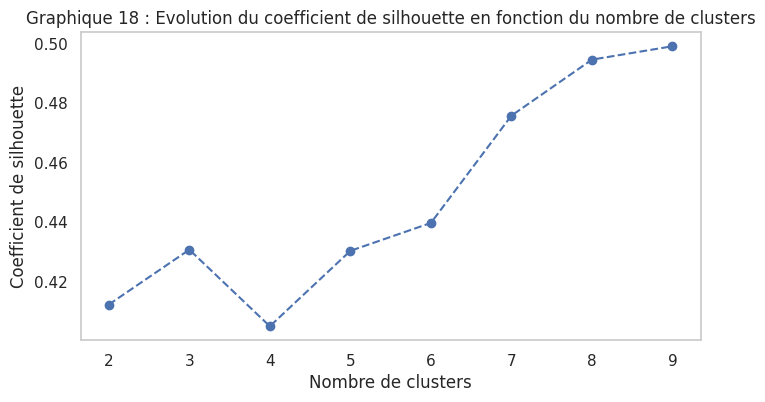

[0.4123048832038773,
 0.4307797605973898,
 0.4050086821458516,
 0.43038514281732704,
 0.43976686911125507,
 0.47587825445359766,
 0.4947316982024037,
 0.49923545452352536]

In [343]:
# Recherche du coefficient de silhouette

X_projected3 = np.random.rand(len(groupe3), 2)

tab_silhouette3 = []
k_range3 = range(2, 10)
for k in k_range3:
    model3 = KMeans(n_clusters=k)
    cluster_labels = model3.fit_predict(X_projected3)
    silhouette_avg3 = silhouette_score(X_projected3, cluster_labels)
    tab_silhouette3.append(silhouette_avg3)

# Affichage du graphique du coefficient de silhouette
fig = plt.figure(figsize=(8, 4))
plt.plot(k_range3, tab_silhouette3, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Graphique 18 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
plt.grid()
plt.show()

# Afficher les valeurs des coefficients de silhouette
tab_silhouette3

### 5.2 Réprésentations visuelles

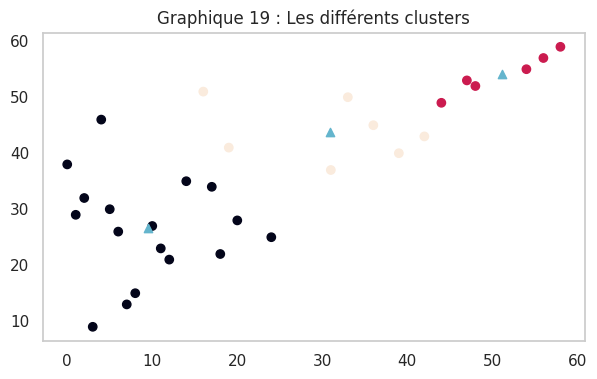

Inertie totale : 16271.319726724534


In [344]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

fig = plt.figure(figsize=(7,4))
model3 = KMeans(n_clusters=3)
model3.fit(Z3)
model3.predict(Z3)
plt.scatter(Z3[:,0], Z3[:,1],c=model3.predict(Z3))
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], marker='^',c='c')
plt.title('Graphique 19 : Les différents clusters')
plt.grid()
plt.show()
print('Inertie totale :', model2.inertia_)

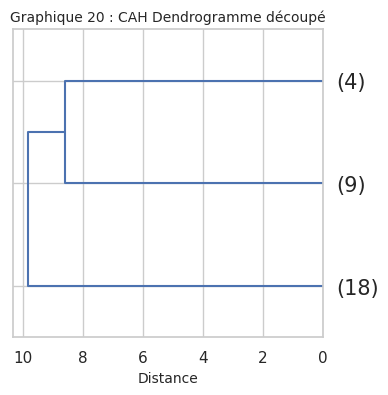

In [345]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement

fig = plt.figure(figsize=(4,4))
plt.title('Graphique 20 : CAH Dendrogramme découpé', fontsize = 10)
plt.xlabel('Distance', fontsize=10)
dendrogram(Z3, labels = groupe3.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

### 5.3 Identification des nouveaux clusters


In [346]:
# Identification des nouveaux clusters

groupes_cah3 = fcluster(Z3, 3, criterion='maxclust')

# index triés des groupes
idg3 = np.argsort(groupes_cah3)

# Affichage des pays selon leurs groupes

df = pd.DataFrame(groupe3.index[idg3], groupes_cah3[idg3]).reset_index()
df3 = df.rename(columns={'index':'Groupe'})
df3.shape

(31, 2)

In [347]:
# Jointure goupe3 et df3

dataf3 = pd.merge(groupe3, df3, on ='Zone')
dataf3.set_index('Zone', inplace=True)
dataf3.shape

(31, 9)

In [348]:
# Affichage

dataf3.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,1
Autriche,54173.0,63.583815,85.549133,0.037364,1035.1440,8819.901,1.05,65.0,2
Bosnie-Herzégovine,13400.0,18.181818,110.909091,-0.070305,1352.4630,3351.525,-0.35,56.0,1
Bulgarie,21470.0,68.789809,68.152866,-0.031573,1760.7070,7102.444,0.33,81.0,1
Canada,48317.2,12.700628,98.883461,0.051832,6004.6450,36732.095,1.10,154.0,3


In [349]:
# Nombre de pays par groupe

dataf3['Groupe'].value_counts()

Groupe
1    18
2     9
3     4
Name: count, dtype: int64

In [350]:
# Identification des différents clusters
# Cluster01

cluster01 = dataf3.loc[dataf3['Groupe']==1]
cluster01

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Allemagne,53071.5,48.418631,87.061530,0.020819,439.8984,82658.409,0.59,71.0,1
Bosnie-Herzégovine,13400.0,18.181818,110.909091,-0.070305,1352.4630,3351.525,-0.35,56.0,1
Bulgarie,21470.0,68.789809,68.152866,-0.031573,1760.7070,7102.444,0.33,81.0,1
Croatie,27207.0,53.333333,135.555556,-0.026309,1081.7620,4182.857,0.69,37.0,1
Espagne,39528.9,13.694055,101.202405,-0.008831,1054.6560,46647.428,0.28,105.0,1
Estonie,33821.9,72.413793,68.965517,-0.002848,1859.0910,1319.390,0.65,86.0,1
Finlande,47570.1,14.414414,116.216216,0.017840,1911.1380,5511.371,1.08,68.0,1
Grèce,28604.9,44.382022,138.202247,-0.019634,2098.7260,10569.450,-0.07,53.0,1
Hongrie,29501.1,21.804511,185.338346,-0.013638,1247.2400,9729.823,0.81,104.0,1


In [351]:
# Cluster02

cluster02 = dataf3.loc[dataf3['Groupe']==2]
cluster02

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Autriche,54173.0,63.583815,85.549133,0.037364,1035.144000,8819.901,1.05,65.0,2
Chypre,38415.1,36.842105,65.789474,0.039322,2954.551000,1179.678,0.54,91.0,2
Danemark,55356.7,79.640719,103.592814,0.021631,1027.609000,5732.274,0.87,112.0,2
Irlande,77749.2,77.343750,85.937500,0.031483,778.203100,4753.279,1.00,100.0,2
Malte,43508.8,64.285714,28.571429,0.038226,1752.693000,437.933,1.25,103.0,2
Norvège,64050.8,1.960784,99.019608,0.056369,1342.890000,5296.326,1.17,66.0,2
Suisse,69103.6,38.345865,68.421053,0.055918,436.077800,8455.804,1.26,55.0,2
Suède,51948.0,44.919786,83.957219,0.037943,1545.797000,9904.896,0.98,61.0,2
Tchéquie,38824.9,46.586345,65.461847,0.005646,6012.847299,10641.034,1.00,82.0,2


In [352]:
# Cluster03

cluster03 = dataf3.loc[dataf3['Groupe']==3]
cluster03

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Canada,48317.2,12.700628,98.883461,0.051832,6004.645000,36732.095,1.10,154.0,3
Japon,41444.2,44.265010,91.718427,-0.007170,9725.629000,127502.725,1.11,67.0,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,46372.4,34.870188,81.199642,0.034128,6012.847299,66727.461,0.39,120.0,3
République de Corée,40957.4,16.042155,98.126464,0.020690,6012.847299,51096.415,0.39,62.0,3


### 5.4 Comparaison des sous-groupes


In [353]:
# Afficher les moyennes des variables de chaque groupe
# Comparaison des moyennes des variables

groupe = (1,2,3)
for n in groupe:
    moyenne = dataf3.loc[dataf3['Groupe']==n].mean()
    print(moyenne)

PIB                            33908.100000
TDI(%)                            40.785767
TAS(%)                           116.658054
croissance_demographique(%)       -0.014448
distance_France(km)             1461.755667
population_2017                17349.848444
stabilite_politique                0.577222
disponibilite_alimentaire         78.388889
Groupe                             1.000000
dtype: float64
PIB                            54792.233333
TDI(%)                            50.389876
TAS(%)                            76.255564
croissance_demographique(%)        0.035989
distance_France(km)             1876.201355
population_2017                 6135.680556
stabilite_politique                1.013333
disponibilite_alimentaire         81.666667
Groupe                             2.000000
dtype: float64
PIB                            44272.800000
TDI(%)                            26.969495
TAS(%)                            92.481998
croissance_demographique(%)        0.024870
di

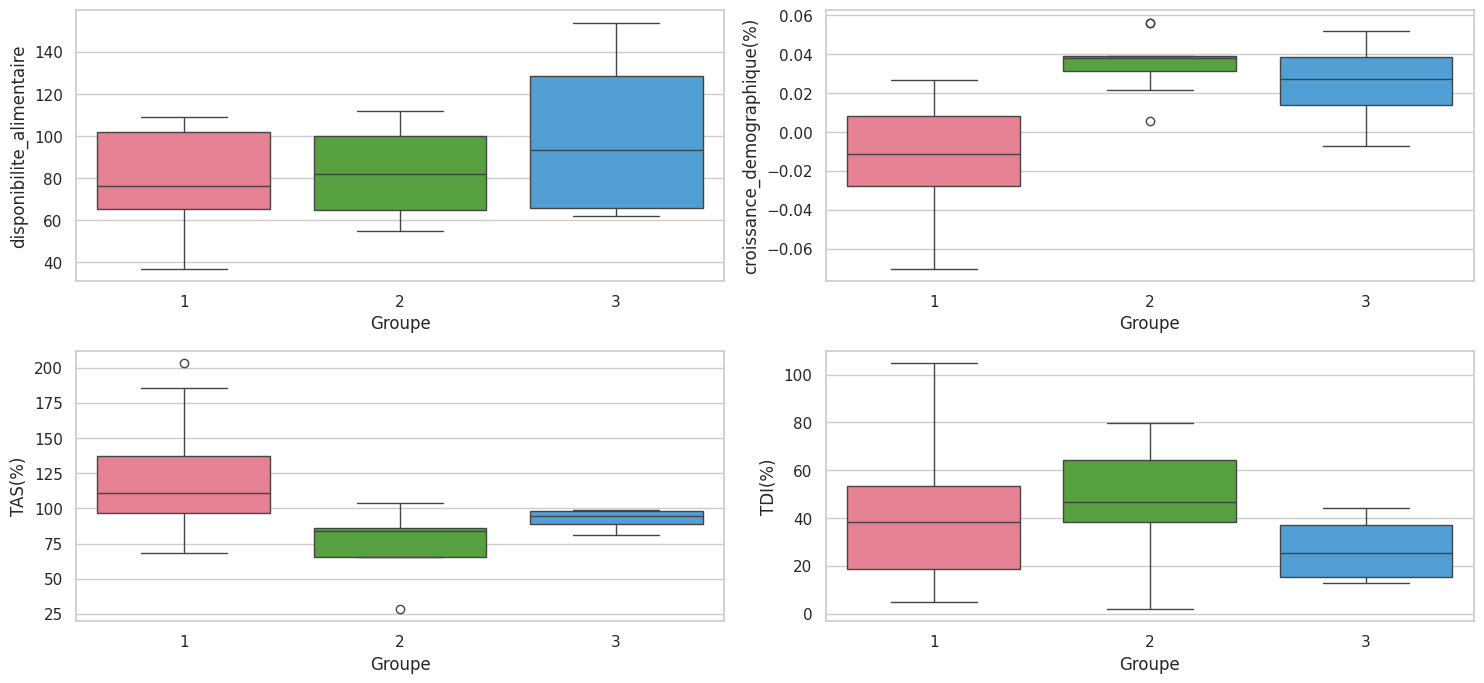

In [354]:
# Comparaison visuelle des clusters par des Boxplots

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf3['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf3, x='Groupe', y='disponibilite_alimentaire', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf3, x='Groupe', y='croissance_demographique(%)', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf3, x='Groupe', y='TAS(%)', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf3, x='Groupe', y='TDI(%)', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

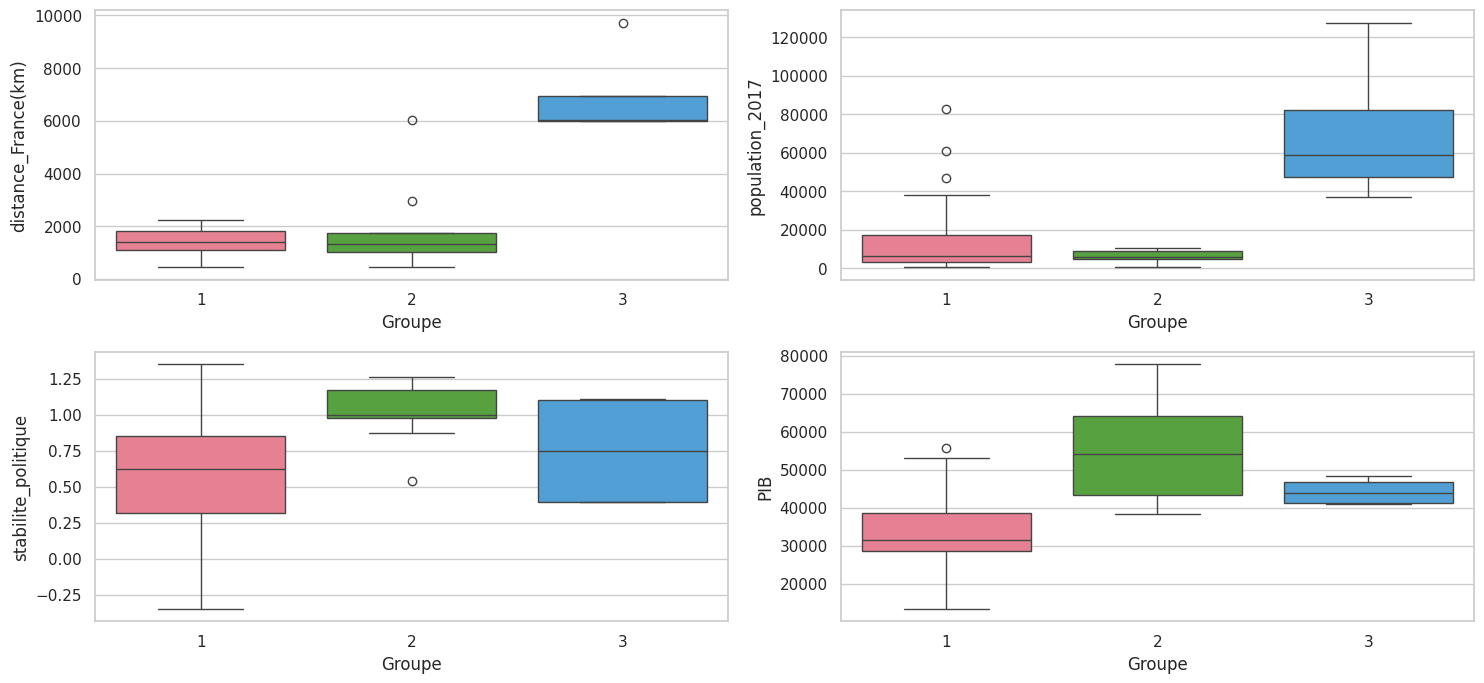

In [355]:
# Comparaison visuelle des Box-plots des variables des clusters

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")

# Définir une palette de couleurs
palette = sns.color_palette("husl", len(dataf3['Groupe'].unique()))

# Premier subplot
plt.subplot(221)
sns.boxplot(data=dataf3, x='Groupe', y='distance_France(km)', palette=palette)

# Deuxième subplot
plt.subplot(222)
sns.boxplot(data=dataf3, x='Groupe', y='population_2017', palette=palette)

# Troisième subplot
plt.subplot(223)
sns.boxplot(data=dataf3, x='Groupe', y='stabilite_politique', palette=palette)

# Quatrième subplot
plt.subplot(224)
sns.boxplot(data=dataf3, x='Groupe', y='PIB', palette=palette)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [356]:
# Suppression d'une colonne

cluster02 = cluster02.drop(columns = ['Groupe'])

In [357]:
# Classement par population décroissante

cluster02.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Danemark,55356.7,79.640719,103.592814,0.021631,1027.609000,5732.274,0.87,112.0
Irlande,77749.2,77.343750,85.937500,0.031483,778.203100,4753.279,1.00,100.0
Malte,43508.8,64.285714,28.571429,0.038226,1752.693000,437.933,1.25,103.0
Autriche,54173.0,63.583815,85.549133,0.037364,1035.144000,8819.901,1.05,65.0
Tchéquie,38824.9,46.586345,65.461847,0.005646,6012.847299,10641.034,1.00,82.0
Suède,51948.0,44.919786,83.957219,0.037943,1545.797000,9904.896,0.98,61.0
Suisse,69103.6,38.345865,68.421053,0.055918,436.077800,8455.804,1.26,55.0
Chypre,38415.1,36.842105,65.789474,0.039322,2954.551000,1179.678,0.54,91.0
Norvège,64050.8,1.960784,99.019608,0.056369,1342.890000,5296.326,1.17,66.0


In [358]:
# Classement par population décroissante

cluster02.sort_values(by='population_2017', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Tchéquie,38824.9,46.586345,65.461847,0.005646,6012.847299,10641.034,1.00,82.0
Suède,51948.0,44.919786,83.957219,0.037943,1545.797000,9904.896,0.98,61.0
Autriche,54173.0,63.583815,85.549133,0.037364,1035.144000,8819.901,1.05,65.0
Suisse,69103.6,38.345865,68.421053,0.055918,436.077800,8455.804,1.26,55.0
Danemark,55356.7,79.640719,103.592814,0.021631,1027.609000,5732.274,0.87,112.0
Norvège,64050.8,1.960784,99.019608,0.056369,1342.890000,5296.326,1.17,66.0
Irlande,77749.2,77.343750,85.937500,0.031483,778.203100,4753.279,1.00,100.0
Chypre,38415.1,36.842105,65.789474,0.039322,2954.551000,1179.678,0.54,91.0
Malte,43508.8,64.285714,28.571429,0.038226,1752.693000,437.933,1.25,103.0


Tchéquie, Suède, Autriche, Suisse

Merci de votre attention ...